In [129]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
pd.set_option('display.max_columns', None)


In [130]:
employee_df=pd.read_excel("C:/Users/Sarath/Desktop/Datascience/Pythondatasets/aspiring_employees.xlsx")

In [131]:
employee_df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [132]:
employee_df.tail()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
3993,train,47916,280000,2011-10-01,2012-10-01 00:00:00,software engineer,New Delhi,m,1987-04-15,52.09,cbse,2006,55.50,cbse,6268,2,B.Tech/B.E.,information technology,61.50,6268,0,Haryana,2010,365,334,475,0.276047,345,-1,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,train,752781,100000,2013-07-01,2013-07-01 00:00:00,technical writer,Hyderabad,f,1992-08-27,90.00,state board,2009,93.00,state board,4883,2,B.Tech/B.E.,electronics and communication engineering,77.30,4883,1,Telangana,2013,415,410,535,0.881620,325,420,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,train,355888,320000,2013-07-01,present,associate software engineer,Bangalore,m,1991-07-03,81.86,"bse,odisha",2008,65.50,"chse,odisha",9786,2,B.Tech/B.E.,computer engineering,70.00,9786,0,Orissa,2012,475,475,465,0.488348,405,-1,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,train,947111,200000,2014-07-01,2015-01-01 00:00:00,software developer,Asifabadbanglore,f,1992-03-20,78.72,state board,2010,69.88,state board,979,2,B.Tech/B.E.,computer science & engineering,70.42,979,1,Karnataka,2014,450,410,320,0.744758,445,-1,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943
3997,train,324966,400000,2013-02-01,present,senior systems engineer,Chennai,f,1991-02-26,70.60,cbse,2008,68.00,cbse,6609,2,B.Tech/B.E.,information technology,68.00,6609,1,Tamil Nadu,2012,565,515,464,0.600057,435,-1,-1,-1,-1,-1,-1,-1.1128,-0.2793,-0.6343,1.32553,-0.6035


In [133]:
employee_df.columns


Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [134]:
employee_df.shape


(3998, 39)

Dropping unnecessary colomns

In [135]:
# removing colomns unnamed,DOB,collegeid,collegecityid,collegecity tier
employee_df.drop(["Unnamed: 0","CollegeID","CollegeCityID","ID"],axis=1,inplace=True)

In [136]:
employee_df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",2,B.Tech/B.E.,computer engineering,78.00,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,2,B.Tech/B.E.,electronics and communication engineering,70.06,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,2,B.Tech/B.E.,information technology,70.00,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,1,B.Tech/B.E.,computer engineering,74.64,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,2,B.Tech/B.E.,electronics and communication engineering,73.90,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [137]:
employee_df.shape

(3998, 35)

### Data Type conversion

In [138]:
employee_df["DOL"].replace('present',"2015-12-31",inplace=True)
employee_df["DOL"]=pd.to_datetime(employee_df['DOL'])
employee_df['DOL']=employee_df['DOL'].dt.year


In [139]:
employee_df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,2015,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",2,B.Tech/B.E.,computer engineering,78.00,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,2015,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,2,B.Tech/B.E.,electronics and communication engineering,70.06,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,2015,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,2,B.Tech/B.E.,information technology,70.00,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,2015,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,1,B.Tech/B.E.,computer engineering,74.64,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,2,B.Tech/B.E.,electronics and communication engineering,73.90,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [140]:

employee_df["DOB"]=pd.to_datetime(employee_df['DOB'])
employee_df['DOB']=employee_df['DOB'].dt.year
employee_df["DOJ"]=pd.to_datetime(employee_df['DOJ'])
employee_df['DOJ']=employee_df['DOJ'].dt.year


In [141]:
employee_df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012,2015,senior quality engineer,Bangalore,f,1990,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",2,B.Tech/B.E.,computer engineering,78.00,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013,2015,assistant manager,Indore,m,1989,85.4,cbse,2007,85.0,cbse,2,B.Tech/B.E.,electronics and communication engineering,70.06,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014,2015,systems engineer,Chennai,f,1992,85.0,cbse,2010,68.2,cbse,2,B.Tech/B.E.,information technology,70.00,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011,2015,senior software engineer,Gurgaon,m,1989,85.6,cbse,2007,83.6,cbse,1,B.Tech/B.E.,computer engineering,74.64,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014,2015,get,Manesar,m,1991,78.0,cbse,2008,76.8,cbse,2,B.Tech/B.E.,electronics and communication engineering,73.90,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


##### Coverting to categorical datatype

In [142]:
categorical = ['Designation','JobCity', 'Gender','10board','12board','CollegeTier','Specialization','CollegeCityTier','CollegeState',"Degree"]
for cat in categorical:
    employee_df[cat] = employee_df[cat].astype('category')

In [143]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Salary                 3998 non-null   int64   
 1   DOJ                    3998 non-null   int64   
 2   DOL                    3998 non-null   int64   
 3   Designation            3998 non-null   category
 4   JobCity                3998 non-null   category
 5   Gender                 3998 non-null   category
 6   DOB                    3998 non-null   int64   
 7   10percentage           3998 non-null   float64 
 8   10board                3998 non-null   category
 9   12graduation           3998 non-null   int64   
 10  12percentage           3998 non-null   float64 
 11  12board                3998 non-null   category
 12  CollegeTier            3998 non-null   category
 13  Degree                 3998 non-null   category
 14  Specialization         3998 non-null   c

In [144]:
print((employee_df['10percentage'] <=10).sum())
print((employee_df['12percentage'] <=10).sum())
print((employee_df['collegeGPA'] <=10).sum())

0
0
12


In [145]:
#### There are 12 values in college gpa  in 10 point scale we have to convert it into 100 point gpa
employee_df.loc[employee_df['collegeGPA'] <= 10, 'collegeGPA'] *= 10


In [146]:
employee_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,3998.0,307699.849925,212737.499957,35000.0000,180000.000000,300000.000000,370000.000000,4.000000e+06
DOJ,3998.0,2013.038769,1.328372,1991.0000,2012.000000,2013.000000,2014.000000,2.015000e+03
DOL,3998.0,2014.573037,0.852695,2005.0000,2014.000000,2015.000000,2015.000000,2.015000e+03
DOB,3998.0,1990.427464,1.767473,1977.0000,1989.000000,1991.000000,1992.000000,1.997000e+03
10percentage,3998.0,77.925443,9.850162,43.0000,71.680000,79.150000,85.670000,9.776000e+01
12graduation,3998.0,2008.087544,1.653599,1995.0000,2007.000000,2008.000000,2009.000000,2.013000e+03
12percentage,3998.0,74.466366,10.999933,40.0000,66.000000,74.400000,82.600000,9.870000e+01
collegeGPA,3998.0,71.695728,7.406631,49.0700,66.505000,71.800000,76.400000,9.993000e+01
GraduationYear,3998.0,2012.105803,31.857271,0.0000,2012.000000,2013.000000,2014.000000,2.017000e+03
English,3998.0,501.649075,104.940021,180.0000,425.000000,500.000000,570.000000,8.750000e+02


### Handling Null values 

In [147]:
employee_df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012,2015,senior quality engineer,Bangalore,f,1990,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",2,B.Tech/B.E.,computer engineering,78.00,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013,2015,assistant manager,Indore,m,1989,85.4,cbse,2007,85.0,cbse,2,B.Tech/B.E.,electronics and communication engineering,70.06,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014,2015,systems engineer,Chennai,f,1992,85.0,cbse,2010,68.2,cbse,2,B.Tech/B.E.,information technology,70.00,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011,2015,senior software engineer,Gurgaon,m,1989,85.6,cbse,2007,83.6,cbse,1,B.Tech/B.E.,computer engineering,74.64,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014,2015,get,Manesar,m,1991,78.0,cbse,2008,76.8,cbse,2,B.Tech/B.E.,electronics and communication engineering,73.90,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [148]:
print((employee_df==0).sum()[(employee_df==0).sum() > 0])# counting number of 0's 

10board             350
12board             359
CollegeCityTier    2797
GraduationYear        1
dtype: int64


In [149]:
print((employee_df==-1).sum()[(employee_df==-1).sum() > 0]) # counting number of 1's

JobCity                   461
Domain                    246
ComputerProgramming       868
ElectronicsAndSemicon    2854
ComputerScience          3096
MechanicalEngg           3763
ElectricalEngg           3837
TelecomEngg              3624
CivilEngg                3956
dtype: int64


##### Fill the below colomns with NaN values 
 

In [150]:
employee_df["10board"]=employee_df["10board"].replace(0,np.NaN,)
employee_df["12board"]=employee_df["12board"].replace(0,np.NaN)
employee_df["GraduationYear"]=employee_df["GraduationYear"].replace(0,np.NaN)
employee_df["JobCity"]=employee_df["JobCity"].replace(-1,np.NaN)
employee_df["Domain"]=employee_df["Domain"].replace(-1,np.NaN)
employee_df["ComputerProgramming"]=employee_df["ComputerProgramming"].replace(-1,np.NaN)
employee_df["ElectronicsAndSemicon"]=employee_df["ElectronicsAndSemicon"].replace(-1,np.NaN)
employee_df["ComputerScience"]=employee_df["ComputerScience"].replace(-1,np.NaN)
employee_df["MechanicalEngg"]=employee_df["MechanicalEngg"].replace(-1,np.NaN)
employee_df["ElectricalEngg"]=employee_df["ElectricalEngg"].replace(-1,np.NaN)
employee_df["TelecomEngg"]=employee_df["TelecomEngg"].replace(-1,np.NaN)
employee_df["CivilEngg"]=employee_df["CivilEngg"].replace(-1,np.NaN)



#### Flling the  categorical colomns with Mode values of the respective colomns

In [151]:
employee_df['10board'].fillna(employee_df['10board'].mode()[0], inplace = True)
employee_df['12board'].fillna(employee_df['12board'].mode()[0], inplace = True)
employee_df['JobCity'].fillna(employee_df['JobCity'].mode()[0], inplace = True)
employee_df['GraduationYear'].fillna(employee_df['GraduationYear'].mode()[0], inplace = True)
employee_df["GraduationYear"]=employee_df["GraduationYear"].astype(int)


In [152]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Salary                 3998 non-null   int64   
 1   DOJ                    3998 non-null   int64   
 2   DOL                    3998 non-null   int64   
 3   Designation            3998 non-null   category
 4   JobCity                3998 non-null   category
 5   Gender                 3998 non-null   category
 6   DOB                    3998 non-null   int64   
 7   10percentage           3998 non-null   float64 
 8   10board                3998 non-null   category
 9   12graduation           3998 non-null   int64   
 10  12percentage           3998 non-null   float64 
 11  12board                3998 non-null   category
 12  CollegeTier            3998 non-null   category
 13  Degree                 3998 non-null   category
 14  Specialization         3998 non-null   c

####  Filling the numerical values with median of the respective colomns 

In [153]:
employee_df["Domain"].fillna(employee_df["Domain"].median(),inplace=True)
employee_df["ComputerProgramming"].fillna(employee_df["ComputerProgramming"].median(),inplace=True)
employee_df["ElectronicsAndSemicon"].fillna(employee_df["ElectronicsAndSemicon"].median(),inplace=True)
employee_df["ComputerScience"].fillna(employee_df["ComputerScience"].median(),inplace=True)
employee_df["MechanicalEngg"].fillna(employee_df["MechanicalEngg"].median(),inplace=True)
employee_df["ElectricalEngg"].fillna(employee_df["ElectricalEngg"].median(),inplace=True)
employee_df["TelecomEngg"].fillna(employee_df["TelecomEngg"],inplace=True)
employee_df["CivilEngg"].fillna(employee_df["CivilEngg"],inplace=True)


In [154]:
employee_df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012,2015,senior quality engineer,Bangalore,f,1990,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",2,B.Tech/B.E.,computer engineering,78.00,0,Andhra Pradesh,2011,515,585,525,0.635979,445.0,333.0,407.0,407.0,433.0,NaN,NaN,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013,2015,assistant manager,Indore,m,1989,85.4,cbse,2007,85.0,cbse,2,B.Tech/B.E.,electronics and communication engineering,70.06,0,Madhya Pradesh,2012,695,610,780,0.960603,455.0,466.0,407.0,407.0,433.0,NaN,NaN,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014,2015,systems engineer,Chennai,f,1992,85.0,cbse,2010,68.2,cbse,2,B.Tech/B.E.,information technology,70.00,0,Uttar Pradesh,2014,615,545,370,0.450877,395.0,333.0,407.0,407.0,433.0,NaN,NaN,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011,2015,senior software engineer,Gurgaon,m,1989,85.6,cbse,2007,83.6,cbse,1,B.Tech/B.E.,computer engineering,74.64,1,Delhi,2011,635,585,625,0.974396,615.0,333.0,407.0,407.0,433.0,NaN,NaN,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014,2015,get,Manesar,m,1991,78.0,cbse,2008,76.8,cbse,2,B.Tech/B.E.,electronics and communication engineering,73.90,0,Uttar Pradesh,2012,545,625,465,0.124502,455.0,233.0,407.0,407.0,433.0,NaN,NaN,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


#### Finding unique values in 10Board colomns and grouping into 3 categories 'state', 'cbse', 'icse', 

In [155]:
employee_df["10board"].unique()

['board ofsecondary education,ap', 'cbse', 'state board', 'mp board bhopal', 'icse', ..., 'jharkhand acedemic council', 'hse,board', 'board of ssc education andhra pradesh', 'up-board', 'bse,odisha']
Length: 274
Categories (274, object): ['board ofsecondary education,ap', 'cbse', 'state board', 'mp board bhopal', ..., 'hse,board', 'board of ssc education andhra pradesh', 'up-board', 'bse,odisha']

In [156]:
state_list=['board ofsecondary education,ap','state board',
       'mp board bhopal', 
       'karnataka secondary school of examination','up',
       'karnataka state education examination board', 'ssc',
       'kerala state technical education','bseb',
       'state board of secondary education, andhra pradesh',
       'matriculation','gujarat state board','karnataka state board',
       'wbbse', 'maharashtra state board', 'up board',
       'board of secondary education(bse) orissa',
       'little jacky matric higher secondary school',
       'uttar pradesh board', 'bsc,orissa', 'mp board', 'upboard',
       'matriculation board', 'j & k bord', 'rbse',
       'central board of secondary education', 'pseb', 'jkbose',
       'haryana board of school education,(hbse)', 'metric', 'ms board',
       'kseeb', 'stateboard', 'maticulation',
       'karnataka secondory education board', 'mumbai board', 'sslc',
       'kseb', 'board secondary  education', 'matric board',
       'board of secondary education',
       'west bengal board of secondary education',
       'jharkhand secondary examination board,ranchi', 'u p board',
       'bseb,patna', 'hsc', 'bse', 'sss pune',
       'karnataka education board (keeb)', 'kerala',
       'state board of secondary education( ssc)', 'gsheb',
       'up(allahabad)', 'nagpur', 'don bosco maatriculation school',
       'karnataka state secondary education board', 'maharashtra',
       'karnataka secondary education board',
       'himachal pradesh board of school education',
       'certificate of middle years program of ib',
       'karnataka board of secondary education',
       'board of secondary education rajasthan', 'uttarakhand board',
       'ua', 'board of secendary education orissa',
       'karantaka secondary education and examination borad', 'hbsc',
       'kseeb(karnataka secondary education examination board)',
       'cbse[gulf zone]', 'hbse', 'state(karnataka board)',
       'jharkhand accademic council',
       'jharkhand secondary examination board (ranchi)',
       'karnataka secondary education examination board', 'delhi board',
       'mirza ahmed ali baig', 'jseb', 'bse, odisha', 'bihar board',
       'maharashtra state(latur board)', 'rajasthan board', 'mpboard',
       'upbhsie', 'secondary board of rajasthan',
       'tamilnadu matriculation board', 'jharkhand secondary board',
       'board of secondary education,andhara pradesh', 'up baord',
       'state', 'board of intermediate education',
       'state board of secondary education,andhra pradesh',
       'up board , allahabad',
       'stjosephs girls higher sec school,dindigul', 'maharashtra board',
       'education board of kerala', 'board of ssc',
       'maharashtra state board pune',
       'board of school education harayana',
       'secondary school cerfificate', 'maharashtra sate board', 'ksseb',
       'bihar examination board, patna', 'latur',
       'board of secondary education, rajasthan', 'state borad hp',
       'cluny', 'bsepatna', 'up borad', 'ssc board of andrapradesh',
       'matric', 'bse,orissa', 'ssc-andhra pradesh', 'mp',
       'karnataka education board', 'mhsbse',
       'karnataka sslc board bangalore', 'karnataka', 'u p',
       'secondary school of education', 'state board of karnataka',
       'karnataka secondary board', 'andhra pradesh board ssc',
       'stjoseph of cluny matrhrsecschool,neyveli,cuddalore district',
       'hse,orissa', 'national public school', 'nagpur board',
       'jharkhand academic council', 'bsemp',
       'board of secondary education, andhra pradesh',
       'board of secondary education orissa',
       'board of secondary education,rajasthan(rbse)',
       'board of secondary education,ap',
       'board of secondary education,andhra pradesh',
       'jawahar navodaya vidyalaya', 'aisse',
       'karnataka board of higher education', 'bihar',
       'kerala state board', 'cicse', 'tn state board',
       'kolhapur divisional board, maharashtra',
       'bharathi matriculation school', 'uttaranchal state board',
       'wbbsce', 'mp state board', 'seba(assam)', 'anglo indian', 'gseb',
       'uttar pradesh', 'ghseb', 'board of school education uttarakhand',
       'msbshse,pune', 'tamilnadu state board', 'kerala university',
       'uttaranchal shiksha avam pariksha parishad',
       'bse(board of secondary education)',
       'bright way college, (up board)',
       'school secondary education, andhra pradesh',
       'secondary state certificate',
       'maharashtra state board of secondary and higher secondary education,pune',
       'andhra pradesh state board', 'stmary higher secondary', 'cgbse',
       'secondary school certificate', 'rajasthan board ajmer', 'mpbse',
       'pune board', 'cbse ', 'board of secondary education,orissa',
       'maharashtra state board,pune', 'up bord',
       'kiran english medium high school', 'state board (jac, ranchi)',
       'gujarat board', 'state board ', 'sarada high scchool',
       'kalaimagal matriculation higher secondary school',
       'karnataka board', 'maharastra board', 'sslc board',
       'ssc maharashtra board', 'tamil nadu state', 'uttrakhand board',
       'bihar secondary education board,patna',
       'haryana board of school education',
       'sri kannika parameswari highier secondary school, udumalpet',
       'ksseb(karnataka state board)', 'nashik board',
       'jharkhand secondary education board', 'himachal pradesh board',
       'maharashtra satate board',
       'maharashtra state board mumbai divisional board',
       'dav public school,hehal',
       'state board of secondary education, ap',
       'rajasthan board of secondary education', 'hsce',
       'karnataka secondary education',
       'board of secondary education,odisha', 'maharashtra nasik board',
       'west bengal board of secondary examination (wbbse)',
       'holy cross matriculation hr sec school', 'cbsc', 'apssc',
       'bseb patna', 'kolhapur', 'bseb, patna', 'up board allahabad',
       'biharboard', 'nagpur board,nagpur', 'pune', 'gyan bharati school',
       'rbse,ajmer', 'board of secondaray education',
       'secondary school education', 'state bord', 'jbse,jharkhand',
       'hse', 'madhya pradesh board', 'bihar school examination board',
       'west bengal board of secondary eucation', 'state boardmp board ',
       'icse board , new delhi',
       'board of secondary education (bse) orissa',
       'maharashtra state board for ssc',
       'board of secondary school education', 'latur board',
       "stmary's convent inter college", 'nagpur divisional board',
       'ap state board', 'cgbse raipur', 'uttranchal board', 'ksbe',
       'central board of secondary education, new delhi',
       'bihar school examination board patna', 'cbse board',
       'sslc,karnataka', 'mp-bse', 'up bourd', 'dav public school sec 14',
       'board of school education haryana',
       'council for indian school certificate examination',
       'aurangabad board', 'j&k state board of school education',
       'maharashtra state board of secondary and higher secondary education',
       'maharashtra state boar of secondary and higher secondary education',
       'ssc regular', 'karnataka state examination board', 'nasik',
       'west bengal  board of secondary education', 'up board,allahabad',
       'bseb ,patna',
       'state board - west bengal board of secondary education : wbbse',
       'maharashtra state board of secondary & higher secondary education',
       'delhi public school', 'karnataka secondary eduction',
       'secondary education board of rajasthan',
       'maharashtra board, pune', 'rbse (state board)', 'apsche',
       'board of  secondary education',
       'board of high school and intermediate education uttarpradesh',
       'kea', 'board of secondary education - andhra pradesh',
       'ap state board for secondary education', 'seba',
       'punjab school education board, mohali',
       'jharkhand acedemic council', 'hse,board',
       'board of ssc education andhra pradesh', 'up-board', 'bse,odisha']

In [157]:
for i in state_list:
    employee_df['10board'].replace(i,'state',inplace=True)
    
cbse10_list=["cbse","central board of secondary education","cbse board"]

for i in cbse10_list:
    employee_df['10board'].replace(i,'cbse',inplace=True)
    
icse10_list=["icse board","icse"]
for i in icse10_list:
    employee_df['10board'].replace(i,'icse',inplace=True)


employee_df['10board'].unique()

['state', 'cbse', 'icse']
Categories (3, object): ['state', 'cbse', 'icse']

#### Finding unique values in 10Board colomns and grouping into 3 categories 'state', 'cbse', 'icse', 

In [158]:
employee_df["12board"].unique()

['board of intermediate education,ap', 'cbse', 'state board', 'mp board', 'isc', ..., 'scte & vt (diploma)', 'karnataka pu', 'board of intmediate education ap', 'up-board', 'boardofintermediate']
Length: 339
Categories (339, object): ['board of intermediate education,ap', 'cbse', 'state board', 'mp board', ..., 'karnataka pu', 'board of intmediate education ap', 'up-board', 'boardofintermediate']

In [159]:
replace_list_state=['board of intermediate education,ap', 'state board',
       'mp board',  'karnataka pre university board', 'up',
       'p u board, karnataka', 'dept of pre-university education', 'bie',
       'kerala state hse board', 'up board', 'bseb', 'chse', 'puc',
       ' upboard',
       'state  board of intermediate education, andhra pradesh',
       'karnataka state board',
       'west bengal state council of technical education', 'wbchse',
       'maharashtra state board', 'ssc',
       'sda matric higher secondary school', 'uttar pradesh board', 'ibe',
       'chsc', 'board of intermediate', 'upboard', 'sbtet',
       'hisher seconadry examination(state board)', 'pre university',
       'borad of intermediate', 'j & k board',
       'intermediate board of andhra pardesh', 'rbse',
       'central board of secondary education', 'jkbose', 'hbse',
       'board of intermediate education', 'state', 'ms board', 'pue',
       'intermediate state board', 'stateboard', 'hsc',
       'electonincs and communication(dote)', 'karnataka pu board',
       'government polytechnic mumbai , mumbai board', 'pu board',
       'baord of intermediate education', 'apbie', 'andhra board',
       'tamilnadu stateboard',
       'west bengal council of higher secondary education',
       'cbse,new delhi', 'u p board', 'intermediate', 'biec,patna',
       'diploma in engg (e &tc) tilak maharashtra vidayapeeth',
       'hsc pune', 'pu board karnataka', 'kerala', 'gsheb',
       'up(allahabad)', 'nagpur', 'st joseph hr sec school',
       'pre university board', 'ipe', 'maharashtra', 'kea', 'apsb',
       'himachal pradesh board of school education', 'staae board',
       'international baccalaureate (ib) diploma', 'nios',
       'karnataka board of university',
       'board of secondary education rajasthan', 'uttarakhand board',
       'ua', 'scte vt orissa', 'matriculation',
       'department of pre-university education', 'wbscte',
       'preuniversity board(karnataka)', 'jharkhand accademic council',
       'bieap', 'msbte (diploma in computer technology)',
       'jharkhand acamedic council (ranchi)',
       'department of pre-university eduction', 'biec',
       'sjrcw', ' board of intermediate', 'msbte',
       'sri sankara vidyalaya', 'chse, odisha', 'bihar board',
       'maharashtra state(latur board)', 'rajasthan board', 'mpboard',
       'state board of technical eduction panchkula', 'upbhsie', 'apbsc',
       'state board of technical education and training',
       'secondary board of rajasthan',
       'tamilnadu higher secondary education board',
       'jharkhand academic council',
       'board of intermediate education,hyderabad', 'up baord', 'pu',
       'dte', 'board of secondary education', 'pre-university',
       'board of intermediate education,andhra pradesh',
       'up board , allahabad', 'srv girls higher sec school,rasipuram',
       'intermediate board of education,andhra pradesh',
       'intermediate board examination',
       'department of pre-university education, bangalore',
       'stmiras college for girls', 'mbose',
       'department of pre-university education(government of karnataka)',
       'dpue', 'msbte pune', 'board of school education harayana',
       'sbte, jharkhand', 'bihar intermediate education council, patna',
       'higher secondary', 's j polytechnic', 'latur',
       'board of secondary education, rajasthan', 'jyoti nivas', 'pseb',
       'biec-patna', 'board of intermediate education,andra pradesh',
       'chse,orissa', 'pre-university board', 'mp', 'intermediate board',
       'govt of karnataka department of pre-university education',
       'karnataka education board',
       'board of secondary school of education', 'pu board ,karnataka',
       'karnataka secondary education board', 'karnataka sslc',
       'board of intermediate ap', 'u p', 'state board of karnataka',
       'directorate of technical education,banglore', 'matric board',
       'andhpradesh board of intermediate education',
       'stjoseph of cluny matrhrsecschool,neyveli,cuddalore district',
       'bte up', 'scte and vt ,orissa', 'hbsc',
       'jawahar higher secondary school', 'nagpur board', 'bsemp',
       'board of intermediate education, andhra pradesh',
       'board of higher secondary orissa',
       'board of secondary education,rajasthan(rbse)',
       'board of intermediate education:ap,hyderabad', 'science college',
       'karnatak pu board', 'aissce', 'pre university board of karnataka',
       'bihar', 'kerala state board', 'uo board', 
       'karnataka board', 'tn state board',
       'kolhapur divisional board, maharashtra',
       'jaycee matriculation school',
       'board of higher secondary examination, kerala',
       'uttaranchal state board', 'intermidiate', 'bciec,patna', 'bice',
       'karnataka state', 'state broad', 'wbbhse', 'gseb',
       'uttar pradesh', 'ghseb', 'board of school education uttarakhand',
       'gseb/technical education board', 'msbshse,pune',
       'tamilnadu state board', 'board of technical education',
       'kerala university', 'uttaranchal shiksha avam pariksha parishad',
       'chse(concil of higher secondary education)',
       'bright way college, (up board)', 'board of intermidiate',
       'higher secondary state certificate', 'karanataka secondary board',
       'maharashtra board', 'cgbse', 'diploma in computers', 'bte,delhi',
       'rajasthan board ajmer', 'mpbse', 'pune board',
       'state board of technical education', 'gshseb',
       'amravati divisional board', 'dote (diploma - computer engg)',
       'karnataka pre-university board', 'jharkhand board',
       'punjab state board of technical education & industrial training',
       'department of technical education',
       'sri chaitanya junior kalasala', 'state board (jac, ranchi)',
       'aligarh muslim university', 'tamil nadu state board', 'hse',
       'karnataka secondary education', 'state board ',
       'karnataka pre unversity board',
       'ks rangasamy institute of technology',
       'karnataka board secondary education', 'narayana junior college',
       'bteup', 'board of intermediate(bie)', 'hsc maharashtra board',
       'tamil nadu state', 'uttrakhand board', 'psbte',
       'stateboard/tamil nadu', 'intermediate council patna',
       'technical board, punchkula', 'board of intermidiate examination',
       'sri kannika parameswari highier secondary school, udumalpet',
       'ap board', 'nashik board', 'himachal pradesh board',
       'maharashtra satate board',
       'andhra pradesh board of secondary education',
       'tamil nadu polytechnic',
       'maharashtra state board mumbai divisional board',
       'department of pre university education',
       'dav public school,hehal', 'board of intermediate education, ap',
       'rajasthan board of secondary education',
       'department of technical education, bangalore', 'chse,odisha',
       'maharashtra nasik board',
       'west bengal council of higher secondary examination (wbchse)',
       'holy cross matriculation hr sec school', 'cbsc',
       'pu  board karnataka', 'biec patna', 'kolhapur', 'bseb, patna',
       'up board allahabad', 'nagpur board,nagpur', 'diploma(msbte)',
       'dav public school', 'pre university board, karnataka',
       'ssm srsecschool', 'state bord', 'jstb,jharkhand',
       'intermediate board of education', 'mp board bhopal', 'pub',
       'madhya pradesh board', 'bihar intermediate education council',
       'west bengal council of higher secondary eucation',
        'mpc',
       'certificate for higher secondary education (chse)orissa',
       'maharashtra state board for hsc',
       'board of intermeadiate education', 'latur board',
       'andhra pradesh', 'karnataka pre-university',
       'lucknow public college', 'nagpur divisional board',
       'ap intermediate board', 'cgbse raipur', 'uttranchal board',
       'jiec', 
       'bihar school examination board patna',
       'state board of technical education harayana', 'mp-bse',
       'up bourd', 'dav public school sec 14',
       'haryana state board of technical education chandigarh',
       'council for indian school certificate examination',
       'jaswant modern school', 'madhya pradesh open school',
       'aurangabad board', 'j&k state board of school education',
       'diploma ( maharashtra state board of technical education)',
       'board of technicaleducation ,delhi',
       'maharashtra state boar of secondary and higher secondary education',
       'hslc (tamil nadu state board)',
       'karnataka state examination board', 'puboard', 'nasik',
       'west bengal board of higher secondary education',
       'up board,allahabad', 'board of intrmediate education,ap', 
       'karnataka state pre- university board',
       'state board - west bengal council of higher secondary education : wbchse',
       'maharashtra state board of secondary & higher secondary education',
       'biec, patna', 'state syllabus', 'cbse board', 'scte&vt',
       'board of intermediate,ap',
       'secnior secondary education board of rajasthan',
       'maharashtra board, pune', 'rbse (state board)',
       'board of intermidiate education,ap',
       'board of high school and intermediate education uttarpradesh',
       'higher secondary education',
       'board fo intermediate education, ap', 'intermedite',
       'ap board for intermediate education', 'ahsec',
       'punjab state board of technical education & industrial training, chandigarh',
       'state board - tamilnadu', 'jharkhand acedemic council',
       'scte & vt (diploma)', 'karnataka pu',
       'board of intmediate education ap', 'up-board',
       'boardofintermediate','andhra pradesh state board','up bord', 'gujarat board', 'intermideate']

In [160]:
for i in replace_list_state:
    employee_df['12board'].replace(i,'state',inplace=True)

replace_list_cbse=['cbse','all india board','central board of secondary education, new delhi', 'cbese']
for i in replace_list_cbse:
    employee_df['12board'].replace(i,'cbse',inplace=True)

replace_list_icse=[ 'isc', 'icse', 'isc board', 'isce', 'cicse','isc board , new delhi']
for i in replace_list_icse:
    employee_df['12board'].replace(i,'icse',inplace=True)


employee_df['12board'].unique()

['state', 'cbse', 'icse']
Categories (3, object): ['state', 'cbse', 'icse']

In [161]:
employee_df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012,2015,senior quality engineer,Bangalore,f,1990,84.3,state,2007,95.8,state,2,B.Tech/B.E.,computer engineering,78.00,0,Andhra Pradesh,2011,515,585,525,0.635979,445.0,333.0,407.0,407.0,433.0,NaN,NaN,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013,2015,assistant manager,Indore,m,1989,85.4,cbse,2007,85.0,cbse,2,B.Tech/B.E.,electronics and communication engineering,70.06,0,Madhya Pradesh,2012,695,610,780,0.960603,455.0,466.0,407.0,407.0,433.0,NaN,NaN,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014,2015,systems engineer,Chennai,f,1992,85.0,cbse,2010,68.2,cbse,2,B.Tech/B.E.,information technology,70.00,0,Uttar Pradesh,2014,615,545,370,0.450877,395.0,333.0,407.0,407.0,433.0,NaN,NaN,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011,2015,senior software engineer,Gurgaon,m,1989,85.6,cbse,2007,83.6,cbse,1,B.Tech/B.E.,computer engineering,74.64,1,Delhi,2011,635,585,625,0.974396,615.0,333.0,407.0,407.0,433.0,NaN,NaN,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014,2015,get,Manesar,m,1991,78.0,cbse,2008,76.8,cbse,2,B.Tech/B.E.,electronics and communication engineering,73.90,0,Uttar Pradesh,2012,545,625,465,0.124502,455.0,233.0,407.0,407.0,433.0,NaN,NaN,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


#### Finding unique values in Degree

In [162]:
employee_df["Degree"].unique()

['B.Tech/B.E.', 'MCA', 'M.Tech./M.E.', 'M.Sc. (Tech.)']
Categories (4, object): ['B.Tech/B.E.', 'MCA', 'M.Tech./M.E.', 'M.Sc. (Tech.)']

In [163]:
employee_df["Specialization"].unique()
pd.set_option('display.max_columns', None)

In [164]:
specs_map={'computer engineering':'CS',
       'electronics and communication engineering': 'EC',
       'information technology':'CS', 
       'computer science & engineering':'CS',
       'mechanical engineering':'ME', 
       'electronics and electrical engineering':'EC',
       'electronics & telecommunications':'EC',
       'instrumentation and control engineering':'IC', 
       'computer application':'CS',
       'electronics and computer engineering':'EC', 
       'electrical engineering':'EEE',
       'applied electronics and instrumentation':"IC",
       'electronics & instrumentation eng':'IC',
       'information science engineering':'CS', 
       'civil engineering':'CE',
       'mechanical and automation':'ME', 
       'industrial & production engineering':'Other',
       'control and instrumentation engineering':'Other',
       'metallurgical engineering':'Other',
       'electronics and instrumentation engineering':'IC',
       'electronics engineering':'EC',
       'ceramic engineering':'Other',
       'chemical engineering':'Other',
       'aeronautical engineering':'Other', 
       'other':'Other',
       'biotechnology':'Other', 
       'embedded systems technology':'EC',
       'electrical and power engineering':'EEE',
       'computer science and technology':'CS', 
       'mechatronics':'ME',
       'automobile/automotive engineering':'Other', 
       'polymer technology':'Other',
       'mechanical & production engineering':'ME',
       'power systems and automation':'EEE', 
       'instrumentation engineering':'IC',
       'telecommunication engineering':"EC",
       'industrial & management engineering':'Other', 
       'industrial engineering':'Other',
       'computer and communication engineering':'CS',
       'information & communication technology':'CS', 
       'information science':'CS',
       'internal combustion engine':'ME', 
        'computer networking':'CS',
        'biomedical engineering':'Other', 
        'electronics':'EC', 
        'computer science':'CS'}

In [165]:
employee_df["Specialization"]=employee_df["Specialization"].map(specs_map)

In [166]:
employee_df["Specialization"].unique()

array(['CS', 'EC', 'ME', 'IC', 'EEE', 'CE', 'Other'], dtype=object)

## Data Visualization

#### For data visualization we filter dataframe based on the highest number of students in each specialization 

In [167]:
employee_df["Specialization"].value_counts()

CS       2288
EC       1227
ME        212
IC         92
EEE        85
Other      65
CE         29
Name: Specialization, dtype: int64

#### From the above the maximum students is from cs specialization

In [168]:
# droping the other specialization colomns 
employee_df.drop(["ElectronicsAndSemicon","MechanicalEngg","ElectricalEngg","TelecomEngg","CivilEngg"],axis=1,inplace=True)

In [169]:
employee_df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012,2015,senior quality engineer,Bangalore,f,1990,84.3,state,2007,95.8,state,2,B.Tech/B.E.,CS,78.00,0,Andhra Pradesh,2011,515,585,525,0.635979,445.0,407.0,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013,2015,assistant manager,Indore,m,1989,85.4,cbse,2007,85.0,cbse,2,B.Tech/B.E.,EC,70.06,0,Madhya Pradesh,2012,695,610,780,0.960603,455.0,407.0,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014,2015,systems engineer,Chennai,f,1992,85.0,cbse,2010,68.2,cbse,2,B.Tech/B.E.,CS,70.00,0,Uttar Pradesh,2014,615,545,370,0.450877,395.0,407.0,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011,2015,senior software engineer,Gurgaon,m,1989,85.6,cbse,2007,83.6,cbse,1,B.Tech/B.E.,CS,74.64,1,Delhi,2011,635,585,625,0.974396,615.0,407.0,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014,2015,get,Manesar,m,1991,78.0,cbse,2008,76.8,cbse,2,B.Tech/B.E.,EC,73.90,0,Uttar Pradesh,2012,545,625,465,0.124502,455.0,407.0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


#### creating new colomns Aptitude score ,Academic performance, , technical skill, and personality test score

In [170]:
employee_df["aptitude_score"]=(employee_df["English"]+employee_df["Logical"]+employee_df["Quant"])/3
employee_df['Acadperf']=(employee_df['10percentage']+employee_df['12percentage']+employee_df['collegeGPA'])/3
employee_df["technical_skill"]=employee_df['Domain']+employee_df['ComputerProgramming']
employee_df["personality_score"]=(employee_df["conscientiousness"]+employee_df["agreeableness"]+employee_df["nueroticism"]+employee_df["openess_to_experience"])/4

In [171]:
employee_df.head()


,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,aptitude_score,Acadperf,technical_skill,personality_score
0,420000,2012,2015,senior quality engineer,Bangalore,f,1990,84.3,state,2007,95.8,state,2,B.Tech/B.E.,CS,78.00,0,Andhra Pradesh,2011,515,585,525,0.635979,445.0,407.0,0.9737,0.8128,0.5269,1.35490,-0.4455,541.666667,86.033333,445.635979,0.673975
1,500000,2013,2015,assistant manager,Indore,m,1989,85.4,cbse,2007,85.0,cbse,2,B.Tech/B.E.,EC,70.06,0,Madhya Pradesh,2012,695,610,780,0.960603,455.0,407.0,-0.7335,0.3789,1.2396,-0.10760,0.8637,695.000000,80.153333,455.960603,0.100375
2,325000,2014,2015,systems engineer,Chennai,f,1992,85.0,cbse,2010,68.2,cbse,2,B.Tech/B.E.,CS,70.00,0,Uttar Pradesh,2014,615,545,370,0.450877,395.0,407.0,0.2718,1.7109,0.1637,-0.86820,0.6721,510.000000,74.400000,395.450877,0.446650
3,1100000,2011,2015,senior software engineer,Gurgaon,m,1989,85.6,cbse,2007,83.6,cbse,1,B.Tech/B.E.,CS,74.64,1,Delhi,2011,635,585,625,0.974396,615.0,407.0,0.0464,0.3448,-0.3440,-0.40780,-0.9194,615.000000,81.280000,615.974396,-0.234000
4,200000,2014,2015,get,Manesar,m,1991,78.0,cbse,2008,76.8,cbse,2,B.Tech/B.E.,EC,73.90,0,Uttar Pradesh,2012,545,625,465,0.124502,455.0,407.0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,545.000000,76.233333,455.124502,-0.299542


In [172]:
# finding the age of students at the time of joining 
employee_df["age_joining"]=employee_df["DOJ"]-employee_df["DOB"]

##  Univariate analysis 

### Pie  Plot

##### Distribution of Designation of students 

Text(0.5, 1.0, 'Designation')

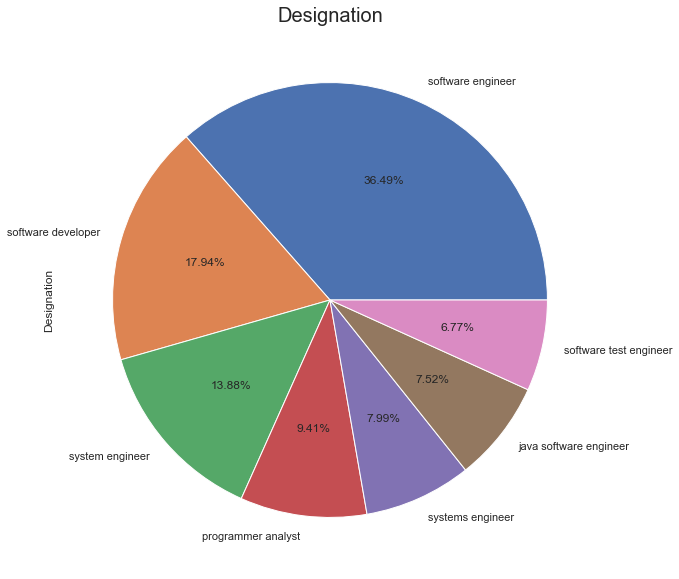

In [173]:
employee_df["Designation"].value_counts().iloc[:7].plot.pie(figsize=(10,10),autopct='%0.2f%%')
plt.title("Designation",size=20)

#### Observations

Pie hart shows the displays the data distribution in percentage 
* From the above pie chart we can observe that majority of the students have designation as software engineer which is 36.49


## Count Plot

##### count  of Male & Female 

C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Gender')

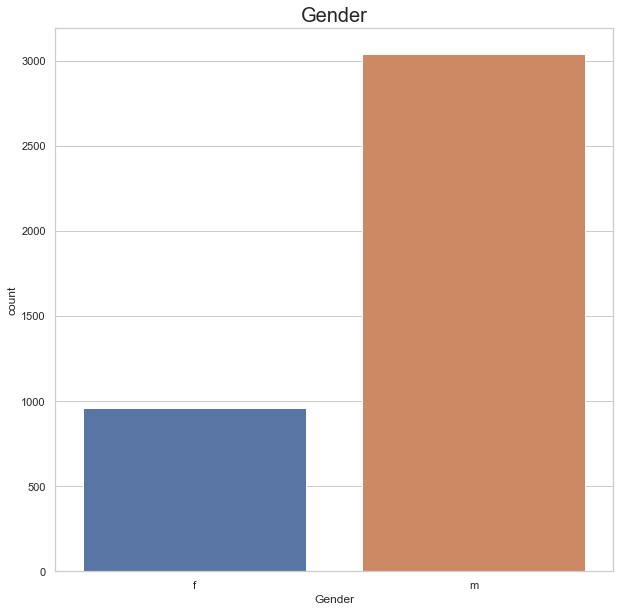

In [174]:
plt.figure(figsize = (10,10))
sns.countplot(employee_df['Gender'])
plt.title("Gender",size=20)


#### Observations 

Show the counts of observations in each categorical bin using bars
 * From the above we can observe that the number of male students is more than female students 

### pie cahrt

##### Distribution of  top 10 Job City in which students are placed

Text(0.5, 1.0, 'JobCity')

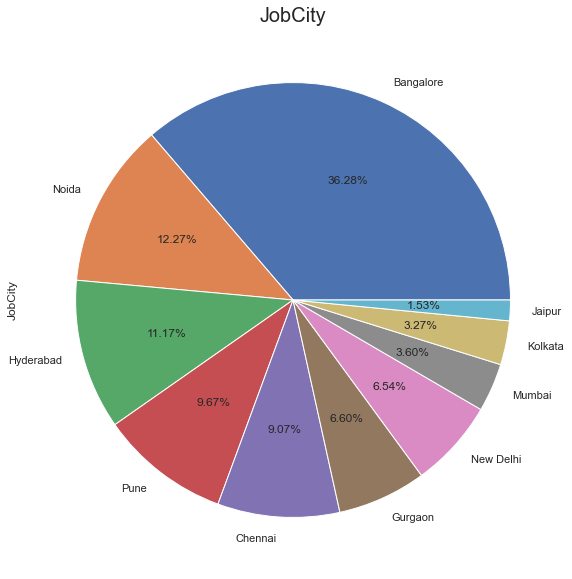

In [175]:
employee_df["JobCity"].value_counts().iloc[:10].plot.pie(figsize=(10,10),autopct='%0.2f%%')
plt.title("JobCity",size=20)

#### Observations 

Pie chart shows the displays the data distribution in percentage 
* From the above pie chart we can observe that majority of job location is Bangalore(36.28%)


### Count plot

C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '10board')

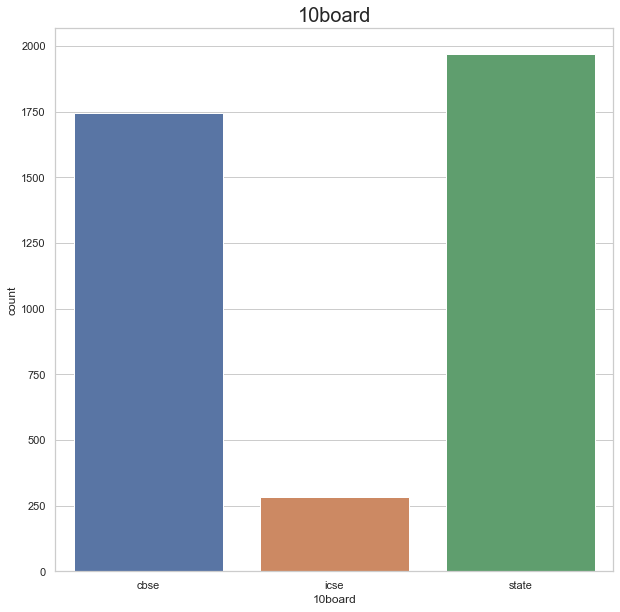

In [176]:
plt.figure(figsize = (10,10))
sns.countplot(employee_df['10board'])
plt.title("10board",size=20)


### Observations

Show the counts of observationsof  each category using bars
 * From the above we can observe that the majority of students are from state syllabus background

### BarPlot

Text(0.5, 1.0, '12board')

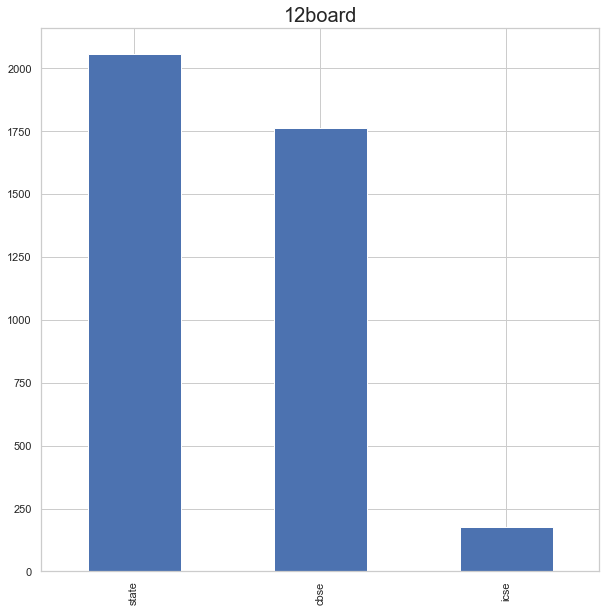

In [177]:
plt.figure(figsize = (10,10))
employee_df["12board"].value_counts().plot.bar()
plt.title("12board",size=20)

### Observations

Bar plot shows the count of categorical varaibles 
* From the above observations we can infer majority of students are from state syllabus background

### Count plot


C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'CollegeTier')

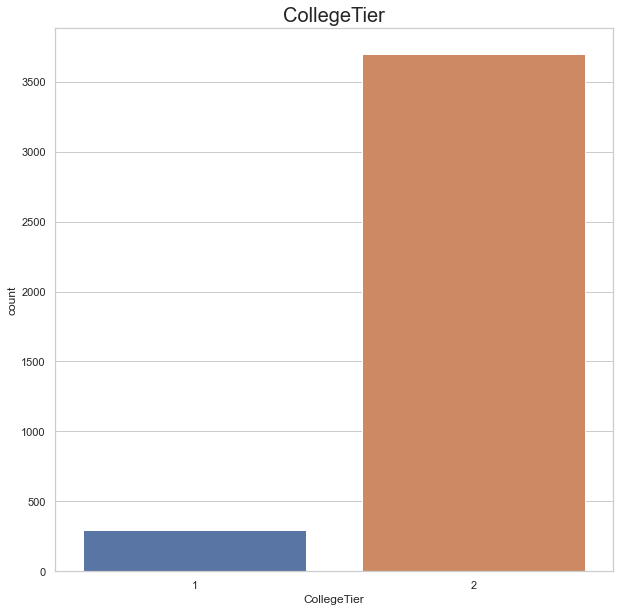

In [178]:
plt.figure(figsize = (10,10))
sns.countplot(employee_df['CollegeTier'])
plt.title("CollegeTier",size=20)

#### Observations

Show the counts of observationsof  each category using bars
 * From the above we can observe that the majority of students are from tier 2 college

### BarPlot 

Text(0.5, 1.0, 'Degree')

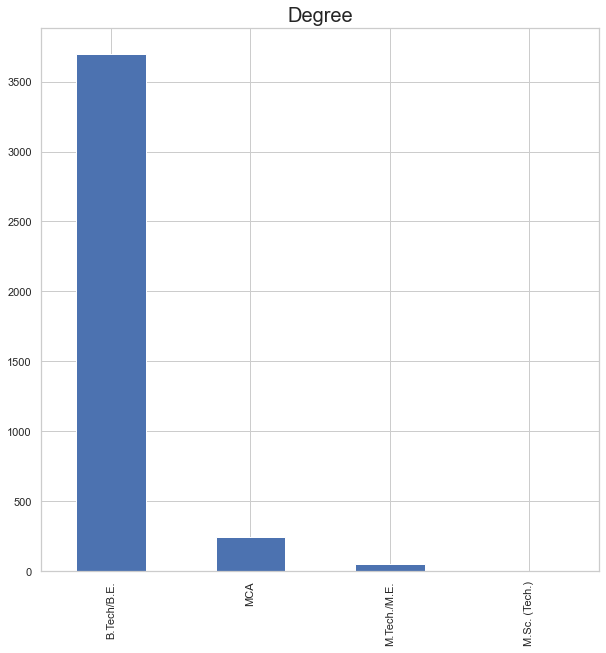

In [179]:
plt.figure(figsize = (10,10))
employee_df["Degree"].value_counts().plot.bar()
plt.title("Degree",size=20)

### Observations

Bar plot shows the count of categorical varaibles 
* From the above observations we can infer majority of students are Btech/BE graduates

In [180]:
employee_df["Degree"].value_counts()

B.Tech/B.E.      3700
MCA               243
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: Degree, dtype: int64

### Pie Chart 

Text(0.5, 1.0, 'Specialization')

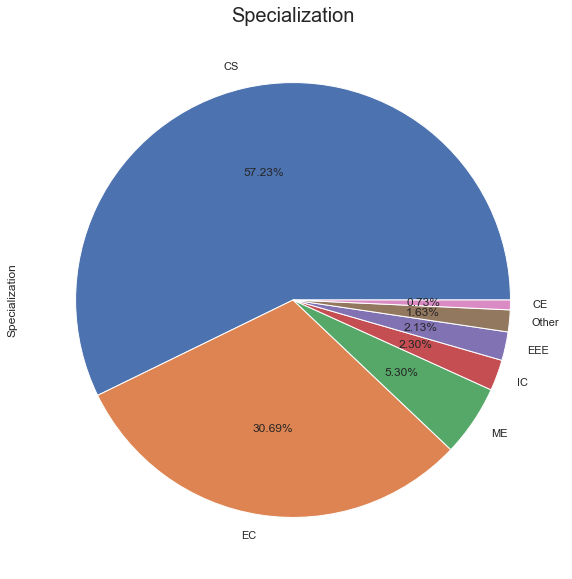

In [181]:
employee_df["Specialization"].value_counts().plot.pie(figsize=(10,10),autopct='%0.2f%%')
plt.title("Specialization",size=20)

### Observations

Pie chart shows the displays the data distribution in percentage 
* From the above pie chart we can observe that majority of students from Computer Science background(57.23%)

### CountPlot

#### Count of College city Tier

C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'CollegeCityTier')

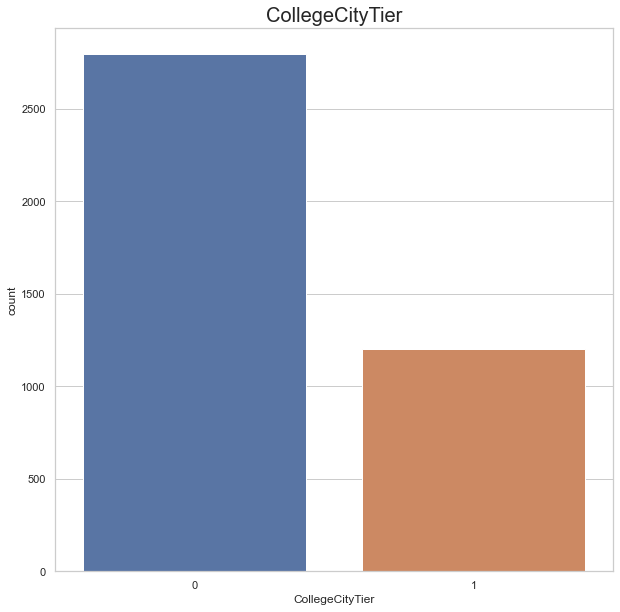

In [182]:
plt.figure(figsize = (10,10))
sns.countplot(employee_df['CollegeCityTier'])
plt.title("CollegeCityTier",size=20)

### Observations

* From the above graph we can find that the most of the students are from city tier 0

### Pie Chart

#### Distribution of top 10 college state

Text(0.5, 1.0, 'CollegeState')

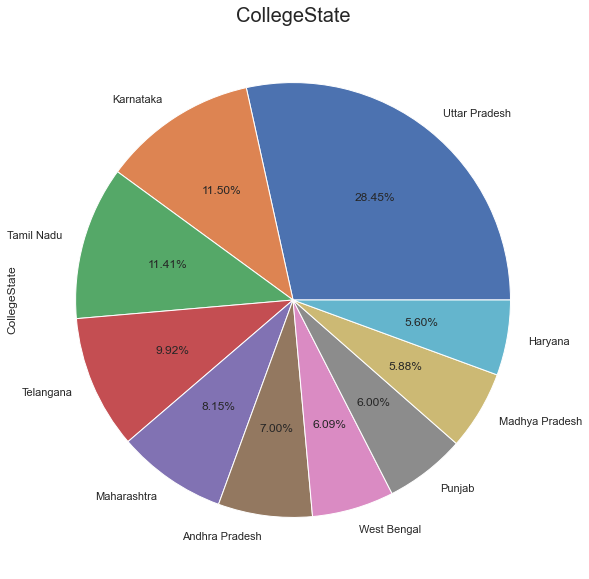

In [183]:
employee_df["CollegeState"].value_counts().iloc[:10].plot.pie(figsize=(10,10),autopct='%0.2f%%')
plt.title("CollegeState",size=20)

### Observations

* From the graph we can find out that most of the students are from the college located in Uttarpradesh(28.45%)

## Anlysing Numerical Value

In [184]:
#Numerical _data=["Salary","10percentage","12graduation","12percentage","collegeGPA","GraduationYear","English","Logical","Quant","ComputerScience","conscientiousness","agreeableness","extraversion"]

### Distribution Plot & Box Plot- English Score 

##### Distribution of Salary of  students 

C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Salary')

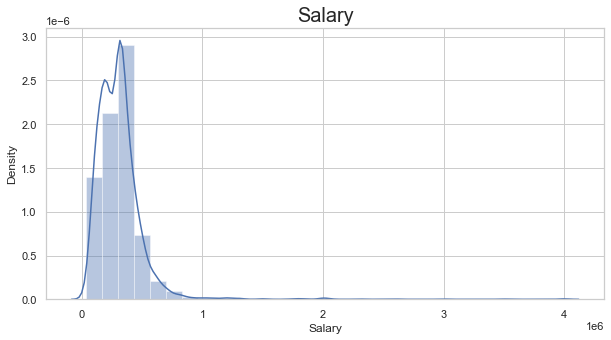

In [185]:
plt.figure(figsize=(10,5))
sns.distplot(employee_df['Salary'],bins=30)
plt.title("Salary", size=20)

#### Distribution combines histogram and density plot 

### Observations

* Above graph shows the distribution of salary of students 
* It is highly right skewed too many outliers from 1 to 4 lakhs 
* Most of the salary is between 0 - 1 lakh 

### Histogram

Text(0.5, 1.0, '10percentage')

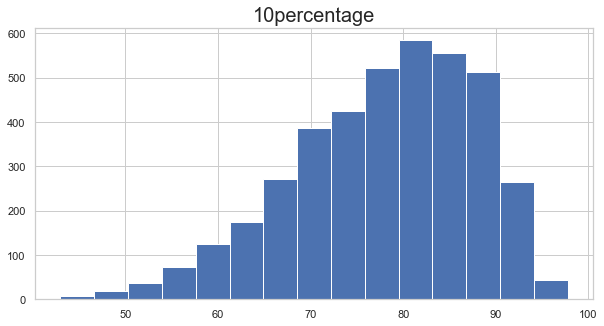

In [186]:
plt.figure(figsize=(10,5))
plt.hist(employee_df['10percentage'],bins=15)
plt.title("10percentage", size=20)

### Observations

* Fromthe graph above shows that the data is highly left skewed 
* outliers- lowest values 0-50 
* most of the students have percentage between 75-90

### Box Plot

Text(0.5, 1.0, 'CollegeGPA')

<Figure size 1800x1200 with 0 Axes>

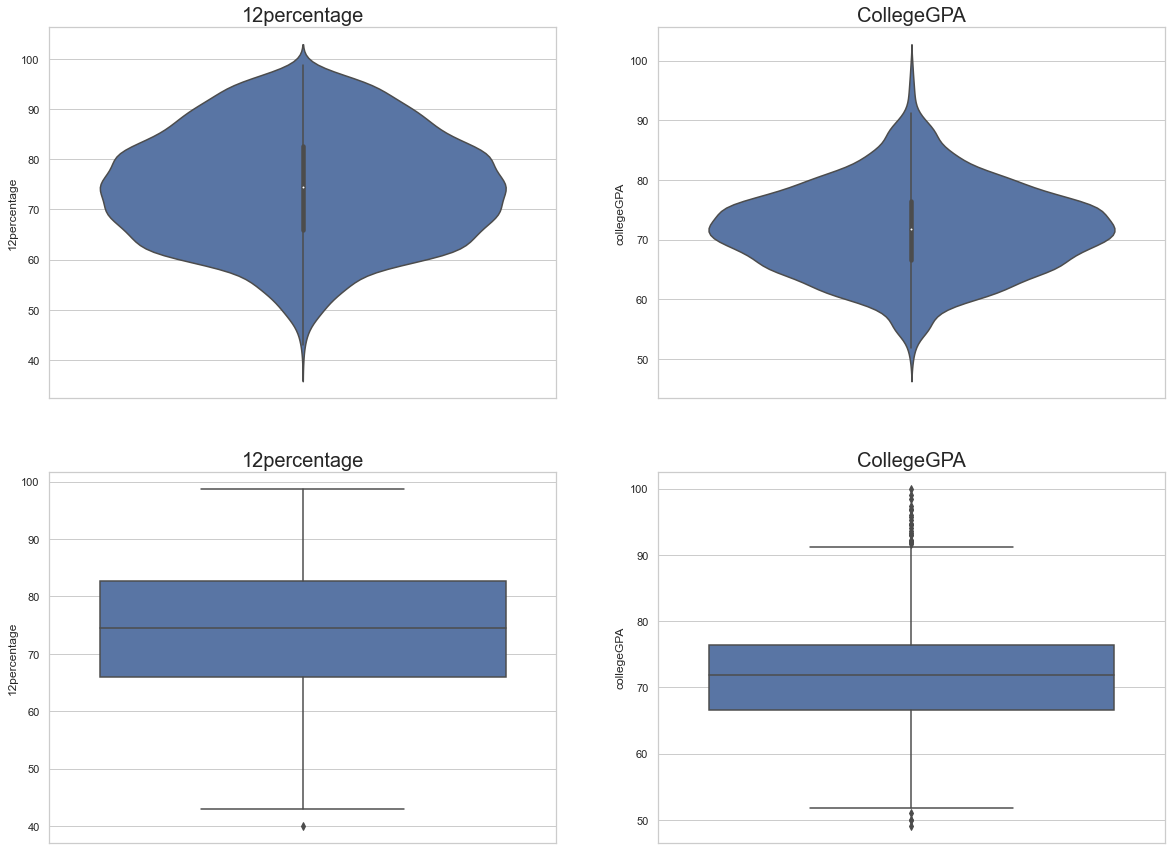

In [187]:
plt.figure(dpi = 300)
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
sns.violinplot(y='12percentage',data=employee_df)
plt.title("12percentage", loc='Center',size=20)

plt.subplot(2,2,2)
sns.violinplot(y='collegeGPA',data = employee_df)
plt.title("CollegeGPA", loc='Center',size=20)

plt.subplot(2,2,3)
sns.boxplot(y='12percentage',data=employee_df)
plt.title("12percentage", loc='Center',size=20)

plt.subplot(2,2,4)
sns.boxplot(y='collegeGPA',data = employee_df)
plt.title("CollegeGPA", loc='Center',size=20)

### Observations

12percentage:
 * From the above graph shows that the data is  left skewed ie there is outlier below 50 
 * Majority of the students have percentage between 65-85
 
collegeGPA:
 * From the graph we can infer that the college GPA data has too many outliers above 90 and below 55 
 * Majority of students have GPA between 68-78 percent


In [188]:
employee_df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,aptitude_score,Acadperf,technical_skill,personality_score,age_joining
0,420000,2012,2015,senior quality engineer,Bangalore,f,1990,84.3,state,2007,95.8,state,2,B.Tech/B.E.,CS,78.00,0,Andhra Pradesh,2011,515,585,525,0.635979,445.0,407.0,0.9737,0.8128,0.5269,1.35490,-0.4455,541.666667,86.033333,445.635979,0.673975,22
1,500000,2013,2015,assistant manager,Indore,m,1989,85.4,cbse,2007,85.0,cbse,2,B.Tech/B.E.,EC,70.06,0,Madhya Pradesh,2012,695,610,780,0.960603,455.0,407.0,-0.7335,0.3789,1.2396,-0.10760,0.8637,695.000000,80.153333,455.960603,0.100375,24
2,325000,2014,2015,systems engineer,Chennai,f,1992,85.0,cbse,2010,68.2,cbse,2,B.Tech/B.E.,CS,70.00,0,Uttar Pradesh,2014,615,545,370,0.450877,395.0,407.0,0.2718,1.7109,0.1637,-0.86820,0.6721,510.000000,74.400000,395.450877,0.446650,22
3,1100000,2011,2015,senior software engineer,Gurgaon,m,1989,85.6,cbse,2007,83.6,cbse,1,B.Tech/B.E.,CS,74.64,1,Delhi,2011,635,585,625,0.974396,615.0,407.0,0.0464,0.3448,-0.3440,-0.40780,-0.9194,615.000000,81.280000,615.974396,-0.234000,22
4,200000,2014,2015,get,Manesar,m,1991,78.0,cbse,2008,76.8,cbse,2,B.Tech/B.E.,EC,73.90,0,Uttar Pradesh,2012,545,625,465,0.124502,455.0,407.0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,545.000000,76.233333,455.124502,-0.299542,23


### Count Plot-12graduatuion & Graduation Year

Text(0.5, 1.0, 'Graduation Year')

<Figure size 1800x1200 with 0 Axes>

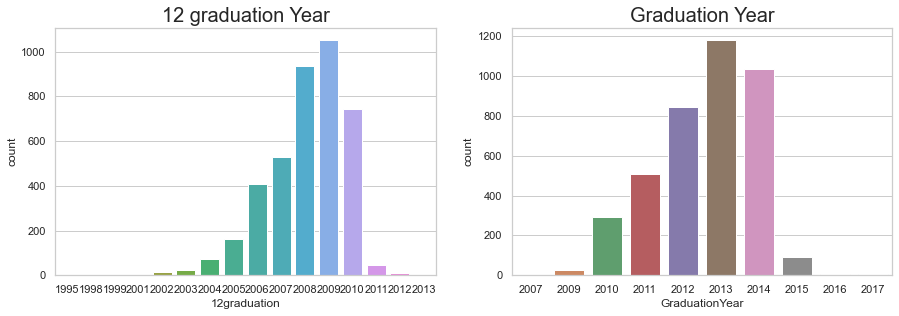

In [189]:
plt.figure(dpi = 300)
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.countplot(x='12graduation',data=employee_df)
plt.title("12 graduation Year", loc='Center',size=20)
plt.subplot(2,2,2)
sns.countplot(x='GraduationYear',data = employee_df)
plt.title("Graduation Year", loc='Center',size=20)




###  Observations

* The above graph gives the count for the 12graduation & graduation year
* The data is left skewed for both 
* 12th majority of students graduated in 20008 & 2009
* Degree majority of students graduated in 2013 &2014



## Distribution Plot & Box Plot-English score

C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'English')

<Figure size 1800x1200 with 0 Axes>

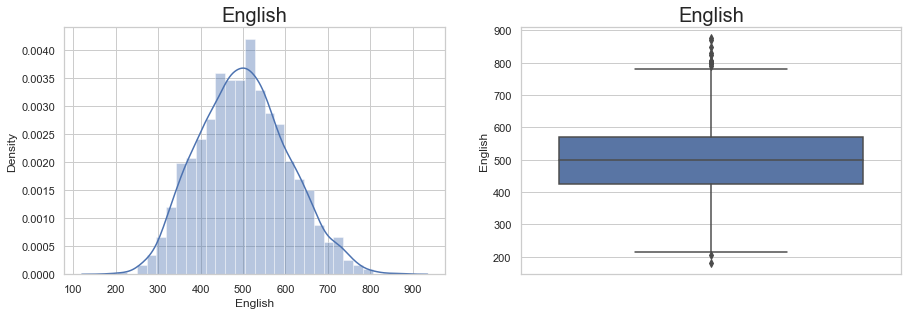

In [190]:
plt.figure(dpi = 300)
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.distplot(employee_df["English"],bins=30)
plt.title("English", loc='Center',size=20)
plt.subplot(2,2,2)
sns.boxplot(y="English",data=employee_df)
plt.title("English", loc='Center',size=20)

### Observations

*Above plots shows the distribution of english score of students 

KDE:
* from the kde plot we can infet the english score follows  normal distribution
* Majoity students have score 400-550

Boxplot:
* Box plot also shows the english score follows a normal distribution 
* Ther is outliers below 200 and above 800
* Majoity students have score 400-550



## Distribution Plot & Box Plot- Quant Score 

C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Quant')

<Figure size 1800x1200 with 0 Axes>

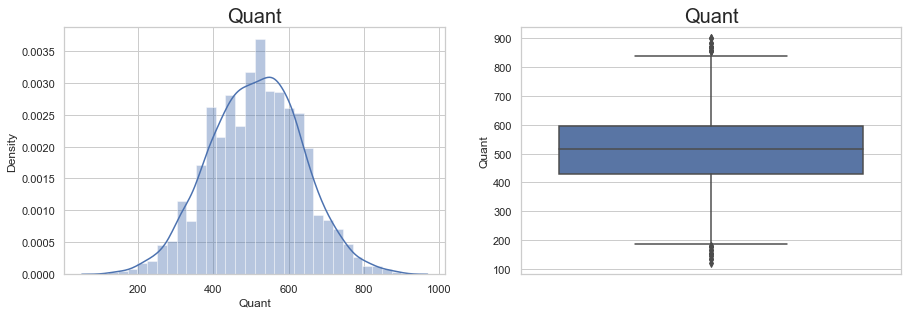

In [191]:
plt.figure(dpi = 300)
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.distplot(employee_df["Quant"],bins=30)
plt.title("Quant", loc='Center',size=20)
plt.subplot(2,2,2)
sns.boxplot(y="Quant",data=employee_df)
plt.title("Quant", loc='Center',size=20)

### Observations 

The above graphs shows distribution of quant score of students 

KDE:

* shows the quant score follows a normal distribution 
* Maximum score is between 450 -600

Boxplot:
* shows the quant score follows a normal distribution 
* Maximum score is between 450 -600
* Shows outliers belo 200 and above 800 score 


## Distribution and Box  Plot- Domain

C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Domain')

<Figure size 1800x1200 with 0 Axes>

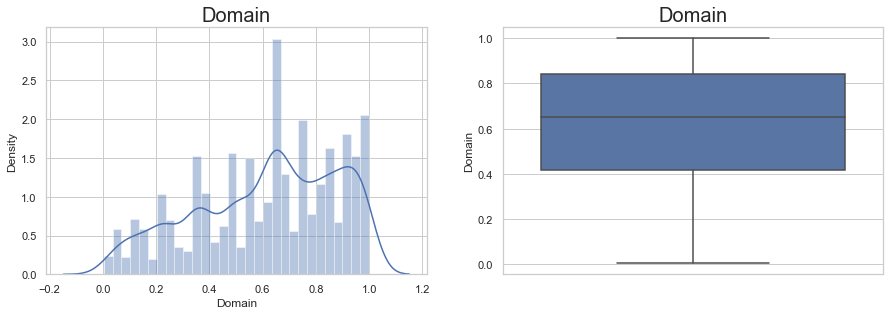

In [192]:
plt.figure(dpi = 300)
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.distplot(employee_df["Domain"],bins=30)
plt.title("Domain", loc='Center',size=20)
plt.subplot(2,2,2)
sns.boxplot(y="Domain",data=employee_df)
plt.title("Domain", loc='Center',size=20)

### Observations

The above graphs shows The disribution of the domain score of students

KDE:
* Domain score is left skewed 
* Maximum scores are between 0.4-0.8

BoxPlot:

* Domain score is left skewed 
* Maximum scores are between 0.4-0.8


## Distribution and Box  Plot-  Computer Programming 

C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'ComputerProgramming')

<Figure size 1800x1200 with 0 Axes>

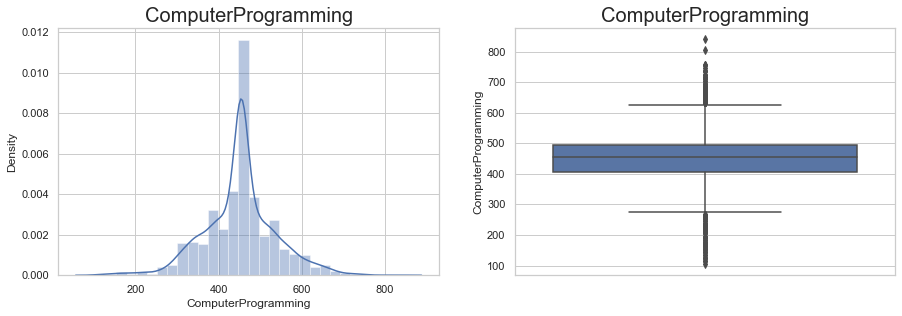

In [193]:
plt.figure(dpi = 300)
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)

sns.distplot(employee_df["ComputerProgramming"],bins=30)
plt.title("ComputerProgramming", loc='Center',size=20)

plt.subplot(2,2,2)

sns.boxplot(y="ComputerProgramming",data=employee_df)
plt.title("ComputerProgramming", loc='Center',size=20)


### Observations 


The above graphs shows The disribution of the Computer programming score  of students

KDE:
* Computer programming  score is follows a normal distibution
* Maximum scores are between 400-500

BoxPlot:

* Domain score is  normally distributed 
* Maximum scores are between 400-500
* Outler below 200 nad above 600


## Distribution , Count and Box  Plot-  Computer Science 

C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'ComputerScience')

<Figure size 1800x1200 with 0 Axes>

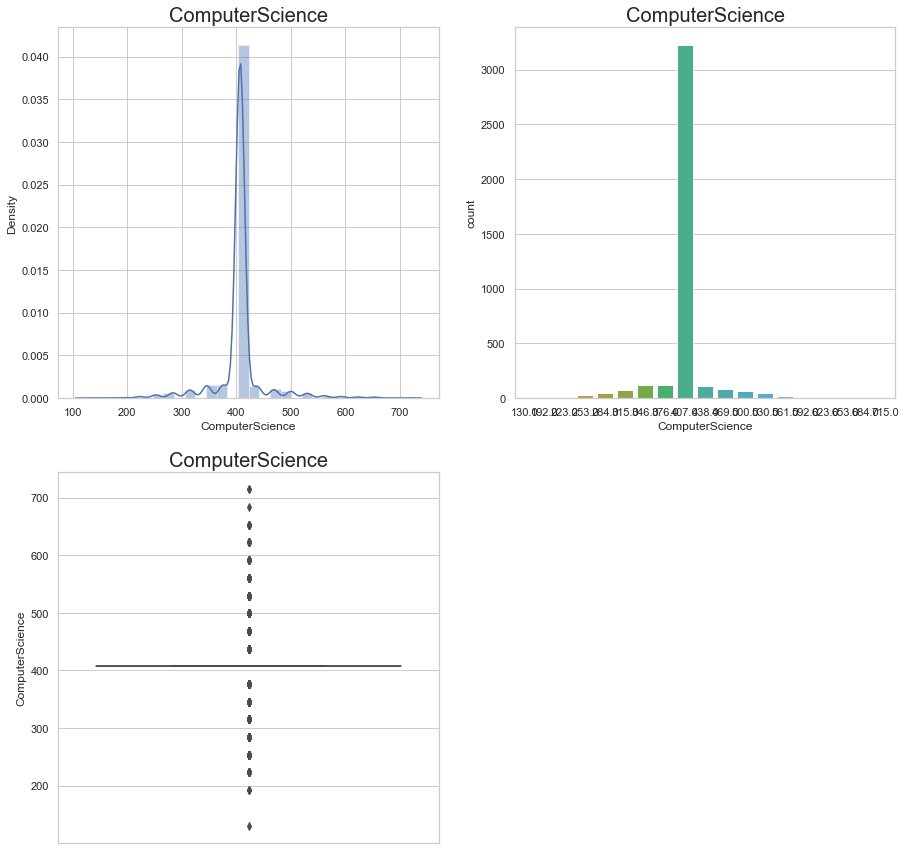

In [194]:
plt.figure(dpi = 300)
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)

sns.distplot(employee_df["ComputerScience"],bins=30)
plt.title("ComputerScience", loc='Center',size=20)

plt.subplot(2,2,2)

sns.countplot(x="ComputerScience",data=employee_df)
plt.title("ComputerScience", loc='Center',size=20)

plt.subplot(2,2,3)

sns.boxplot(y="ComputerScience",data=employee_df)
plt.title("ComputerScience", loc='Center',size=20)

### Observations

The above graphs shows The disribution of the Computer Science  score  of students

KDE:
* Computer Science score is follows a normal distibution
* Maximum scores are between 400-500

BoxPlot:

* Domain score is  normally distributed 
* Maximum scores are around 400-450
* Maximum outlers above and 400 score 

In [195]:
employee_df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,aptitude_score,Acadperf,technical_skill,personality_score,age_joining
0,420000,2012,2015,senior quality engineer,Bangalore,f,1990,84.3,state,2007,95.8,state,2,B.Tech/B.E.,CS,78.00,0,Andhra Pradesh,2011,515,585,525,0.635979,445.0,407.0,0.9737,0.8128,0.5269,1.35490,-0.4455,541.666667,86.033333,445.635979,0.673975,22
1,500000,2013,2015,assistant manager,Indore,m,1989,85.4,cbse,2007,85.0,cbse,2,B.Tech/B.E.,EC,70.06,0,Madhya Pradesh,2012,695,610,780,0.960603,455.0,407.0,-0.7335,0.3789,1.2396,-0.10760,0.8637,695.000000,80.153333,455.960603,0.100375,24
2,325000,2014,2015,systems engineer,Chennai,f,1992,85.0,cbse,2010,68.2,cbse,2,B.Tech/B.E.,CS,70.00,0,Uttar Pradesh,2014,615,545,370,0.450877,395.0,407.0,0.2718,1.7109,0.1637,-0.86820,0.6721,510.000000,74.400000,395.450877,0.446650,22
3,1100000,2011,2015,senior software engineer,Gurgaon,m,1989,85.6,cbse,2007,83.6,cbse,1,B.Tech/B.E.,CS,74.64,1,Delhi,2011,635,585,625,0.974396,615.0,407.0,0.0464,0.3448,-0.3440,-0.40780,-0.9194,615.000000,81.280000,615.974396,-0.234000,22
4,200000,2014,2015,get,Manesar,m,1991,78.0,cbse,2008,76.8,cbse,2,B.Tech/B.E.,EC,73.90,0,Uttar Pradesh,2012,545,625,465,0.124502,455.0,407.0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,545.000000,76.233333,455.124502,-0.299542,23


## Distribution , and Box  Plot-  conscientiousness,agreeableness

C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'conscientiousness')

<Figure size 1800x1200 with 0 Axes>

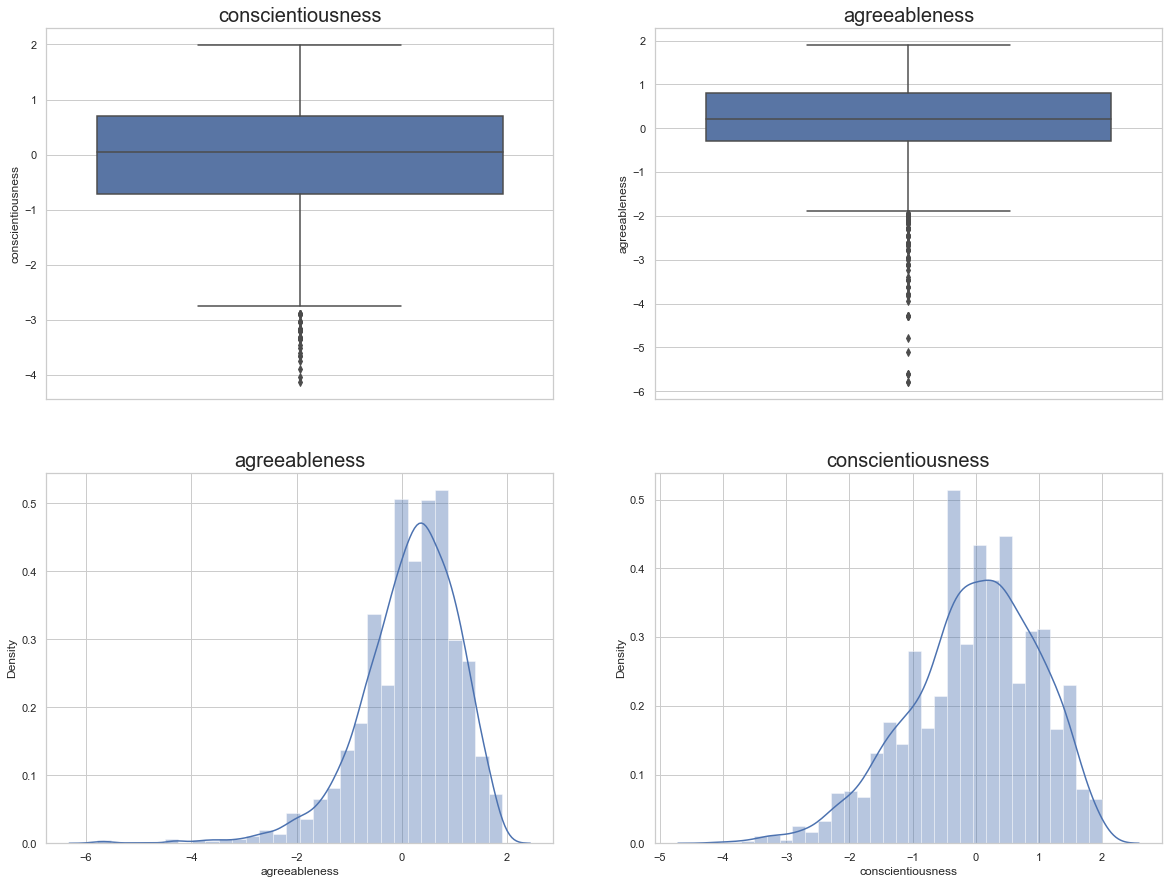

In [196]:
plt.figure(dpi = 300)
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
sns.boxplot(y='conscientiousness',data=employee_df)
plt.title("conscientiousness", loc='Center',size=20)

plt.subplot(2,2,2)
sns.boxplot(y='agreeableness',data = employee_df)
plt.title('agreeableness', loc='Center',size=20)

plt.subplot(2,2,3)
sns.distplot(employee_df['agreeableness'],bins=30)
plt.title('agreeableness', loc='Center',size=20)

plt.subplot(2,2,4)
sns.distplot(employee_df['conscientiousness'], bins=30)
plt.title('conscientiousness', loc='Center',size=20)

### Observations 

The above graphs shows The disribution of the  conscientiousness,agreeableness score  of students

KDE:
* conscientiousness,agreeableness score is left skewed 
* Maximum scores  of conscientiousness is  between -1 to 0.8 
* Maximum scores  of conscientiousness is  between -1 to 1 
BoxPlot:
* conscientiousness,agreeableness score is left skewed 
* Maximum outlers are below -3 

# Bivariate Analysis 

####  From Univariate analysis we could infer about the distributions of each variables and and the outliers
####  Bivariate analysis we are going to compare the target variable based on the predictor varibles 
####  This analysis is to predict the slary(Target variable)  of students based on their academic performance and     AMCAT score 
 
 
 

### Analysis of categorical values with numerical values 

In [197]:
employee_df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,aptitude_score,Acadperf,technical_skill,personality_score,age_joining
0,420000,2012,2015,senior quality engineer,Bangalore,f,1990,84.3,state,2007,95.8,state,2,B.Tech/B.E.,CS,78.00,0,Andhra Pradesh,2011,515,585,525,0.635979,445.0,407.0,0.9737,0.8128,0.5269,1.35490,-0.4455,541.666667,86.033333,445.635979,0.673975,22
1,500000,2013,2015,assistant manager,Indore,m,1989,85.4,cbse,2007,85.0,cbse,2,B.Tech/B.E.,EC,70.06,0,Madhya Pradesh,2012,695,610,780,0.960603,455.0,407.0,-0.7335,0.3789,1.2396,-0.10760,0.8637,695.000000,80.153333,455.960603,0.100375,24
2,325000,2014,2015,systems engineer,Chennai,f,1992,85.0,cbse,2010,68.2,cbse,2,B.Tech/B.E.,CS,70.00,0,Uttar Pradesh,2014,615,545,370,0.450877,395.0,407.0,0.2718,1.7109,0.1637,-0.86820,0.6721,510.000000,74.400000,395.450877,0.446650,22
3,1100000,2011,2015,senior software engineer,Gurgaon,m,1989,85.6,cbse,2007,83.6,cbse,1,B.Tech/B.E.,CS,74.64,1,Delhi,2011,635,585,625,0.974396,615.0,407.0,0.0464,0.3448,-0.3440,-0.40780,-0.9194,615.000000,81.280000,615.974396,-0.234000,22
4,200000,2014,2015,get,Manesar,m,1991,78.0,cbse,2008,76.8,cbse,2,B.Tech/B.E.,EC,73.90,0,Uttar Pradesh,2012,545,625,465,0.124502,455.0,407.0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,545.000000,76.233333,455.124502,-0.299542,23


## Box Plot- Comparison of Salary Based on Degree 

Text(0.5, 1.0, 'Degree vs Salary')

<Figure size 1800x1200 with 0 Axes>

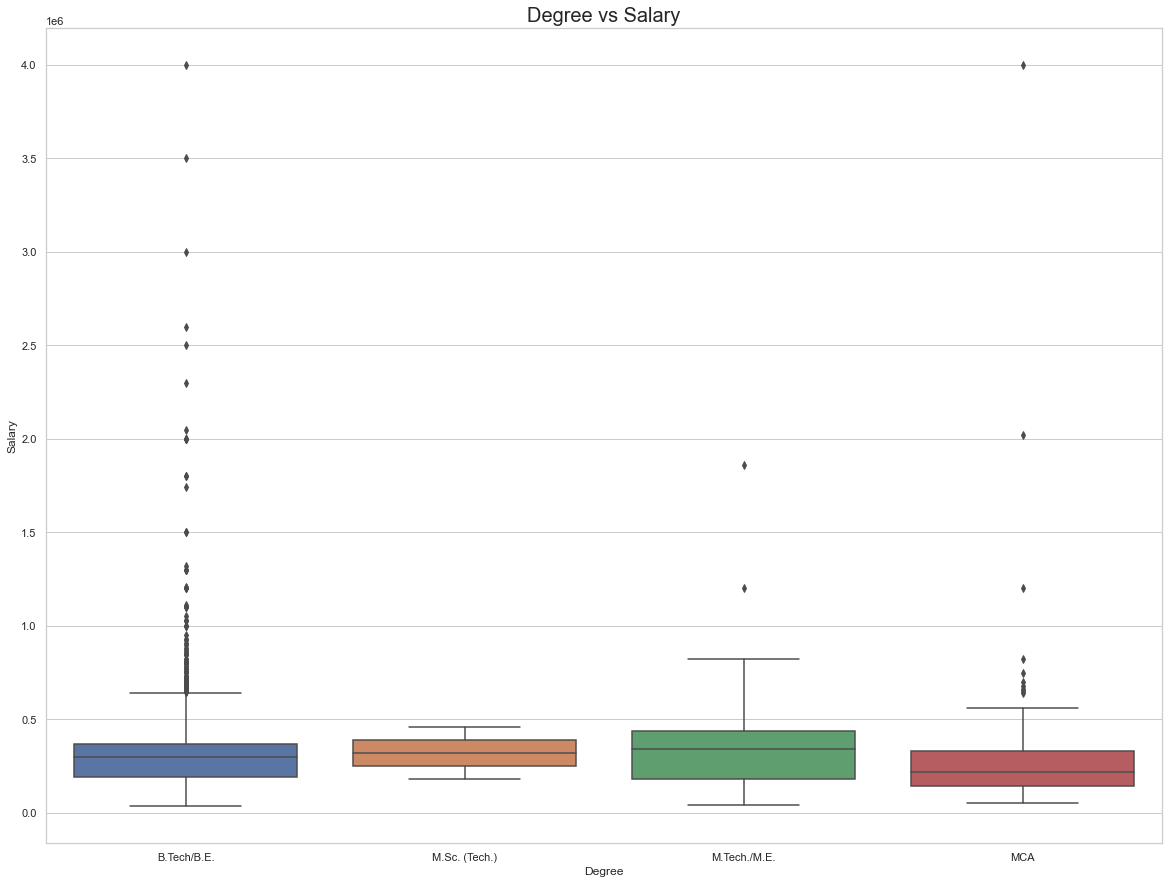

In [198]:
plt.figure(dpi = 300)
plt.figure(figsize=(20,15))

sns.boxplot(x="Degree",y='Salary',data=employee_df)
plt.title("Degree vs Salary", loc='Center',size=20)


### Observations 

* The above graph shows Mtech/ME students slary range is greater than  other degree nad is right skewed 
* The Btech/BE students salary has many outliers above 60K and right skewed 
* MSC student salary has normal distribution
* MCA  students salary is right skewed and has outliers above 55K 

## Strip plot-Comparison of Salary based on 10board 

Text(0.5, 1.0, '10board vs Salary')

<Figure size 1800x1200 with 0 Axes>

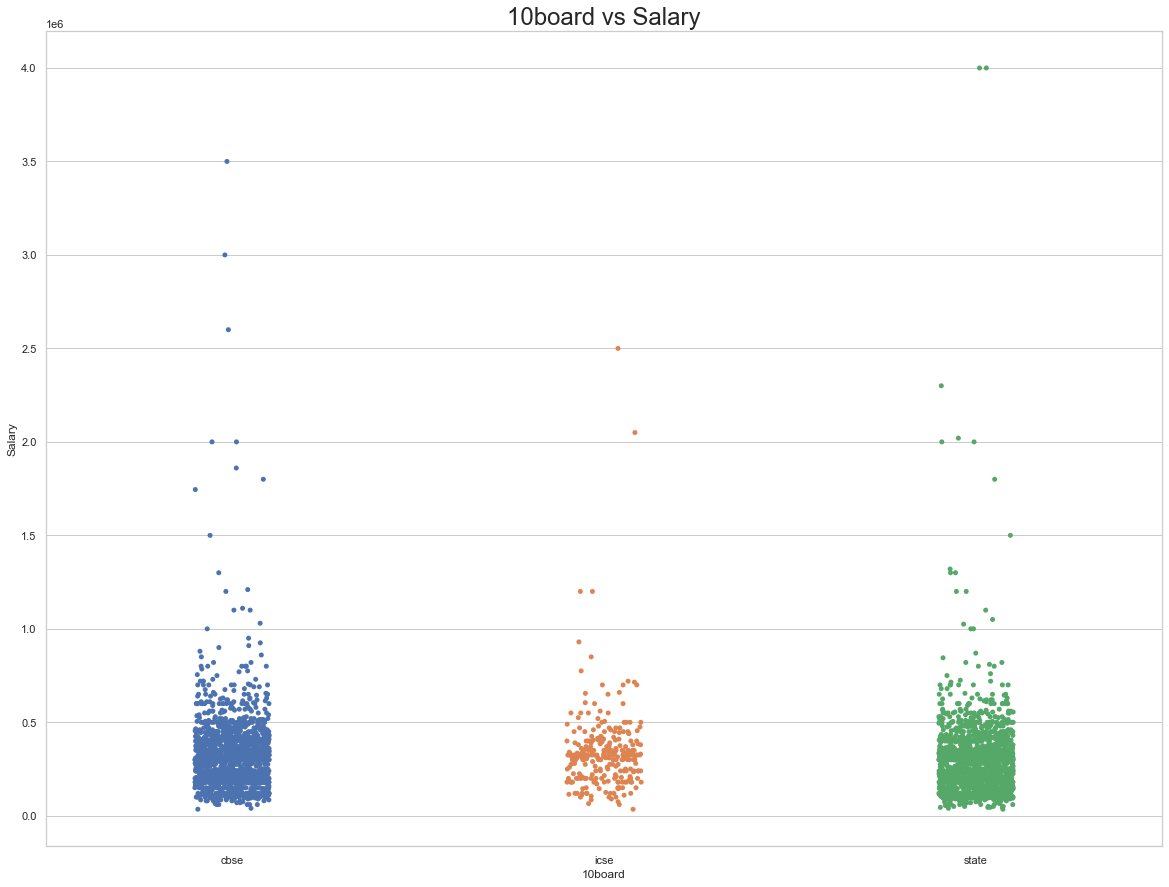

In [199]:
plt.figure(dpi = 300)
plt.figure(figsize=(20,15))

sns.stripplot(x="10board",y='Salary',data=employee_df,jitter =True)
plt.title("10board vs Salary", loc='Center',size=24)


### observations 

* Spread of CBSE students salary is more than state and ICSE even though the state syllabus student has the maximum salary
* CBSE students salary has the maximum salary of 35lakhs 
* State student salary has maximum salary of 4 lakhs 

## Strip plot-Comparison of Salary based on 12board 

Text(0.5, 1.0, '12board vs Salary')

<Figure size 1800x1200 with 0 Axes>

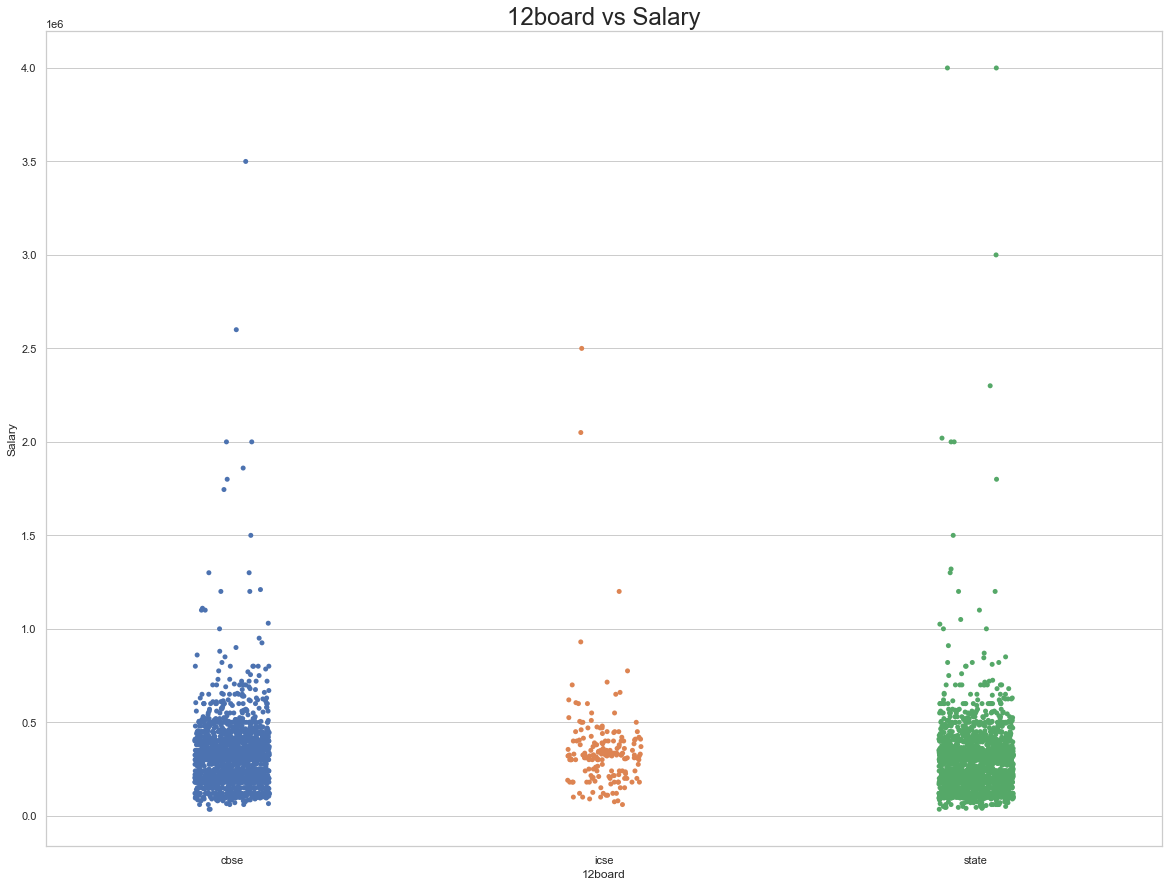

In [200]:
plt.figure(dpi = 300)
plt.figure(figsize=(20,15))

sns.stripplot(x="12board",y='Salary',data=employee_df,jitter =True)
plt.title("12board vs Salary", loc='Center',size=24)

### Observations

* Spread of CBSE students salary is more than state and ICSE even though the state syllabus student has the maximum salary
* CBSE students salary has the maximum salary of 35lakhs 
* State student salary has maximum salary of 4 lakhs 

## Scatter plot -Comparison of Salary based on Specialization

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Specialization vs Salary')

<Figure size 2880x2880 with 0 Axes>

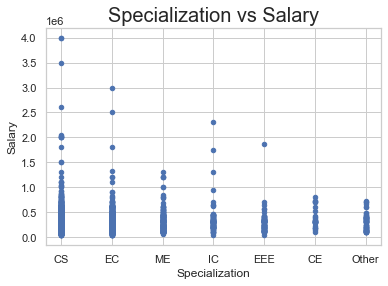

In [201]:
plt.figure(figsize=(40,40))
employee_df.plot(x='Specialization',y="Salary",kind='scatter')
plt.title("Specialization vs Salary",size=20)

### Obsetvations 

* CS students have maximum salary
* Salary range for CS EC and IC is higher than other specialization

## BarPlot- Comparison of Salary based on College Tier

Text(0.5, 1.0, 'College Tier  vs Salary')

<Figure size 1800x1200 with 0 Axes>

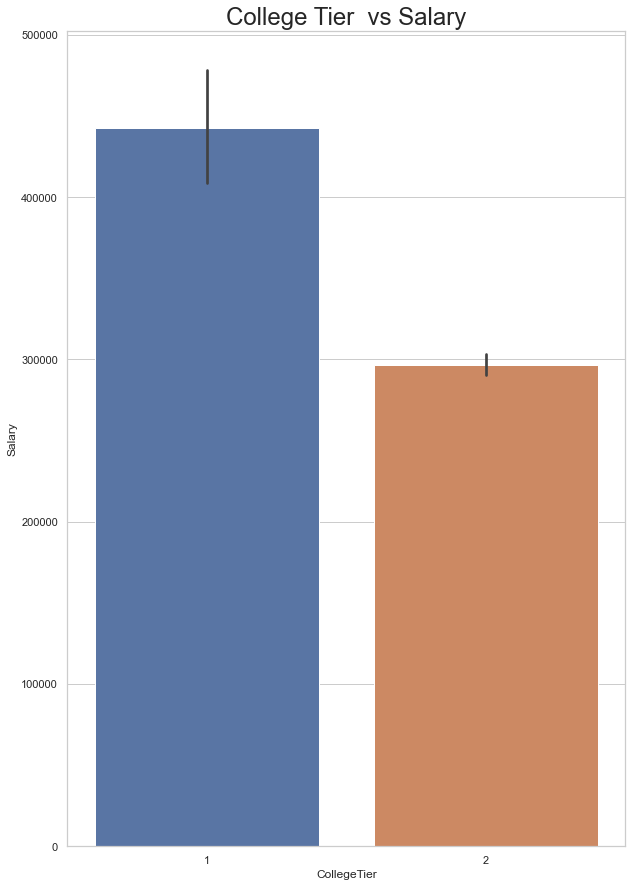

In [202]:
plt.figure(dpi = 300)
plt.figure(figsize=(10,15))
sns.barplot(x="CollegeTier",y='Salary',data=employee_df)
plt.title("College Tier  vs Salary", loc='Center',size=24)

### Observations 

* The above graoh shows that the students from tier 1 college has more salary than students from tier 2 
* Salary of students  is dependend  on colege tier 

## BarPlot- Comparison of Salary based on Gender

Text(0.5, 1.0, 'Gender vs Salary')

<Figure size 1800x1200 with 0 Axes>

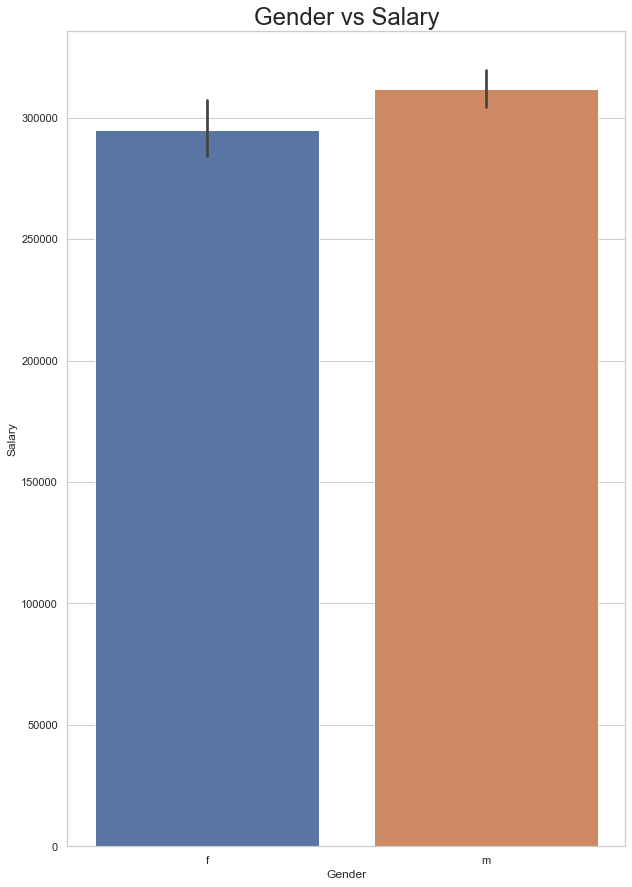

In [203]:
plt.figure(dpi = 300)
plt.figure(figsize=(10,15))
sns.barplot(x="Gender",y='Salary',data=employee_df)
plt.title("Gender vs Salary", loc='Center',size=24)

### Observations 

* There is not much difference in salary between male and female students 
* Salary of student is not dependend on gender

### Analysis of numerical values with numerical  values 

### Scatter plot-Comparison of Salary and 10 percentage 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, '10percentage  vs Salary')

<Figure size 1440x1080 with 0 Axes>

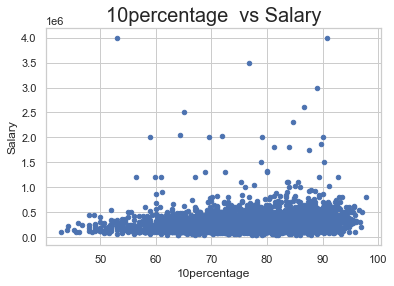

In [78]:
plt.figure(figsize=(20,15))
employee_df.plot(x='10percentage',y="Salary",kind='scatter')
plt.title("10percentage  vs Salary", size=20)

### Observations 

* Scatter plot shows the correlation between variables
* There is  positive relation between salary and 10 percentage
* Salary is  dependend on 10 percentage 

### Regression plot-Comparison of Salary and 10 percentage 

Text(0.5, 1.0, '12percentage vs Salary')

<Figure size 1440x1080 with 0 Axes>

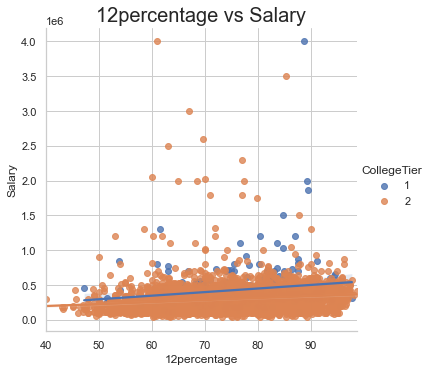

In [79]:
plt.figure(figsize=(20,15))
sns.lmplot(x="12percentage",y="Salary",hue="CollegeTier",data=employee_df)
plt.title("12percentage vs Salary", size=20)



### Observations

 * There is  corelation between salary 12 percentage 
 * Salary is dependend on 12 percentage 
 


### Scatter plot-Comparison of Salary and CollegeGPA



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'collegeGPA  vs Salary')

<Figure size 1440x1080 with 0 Axes>

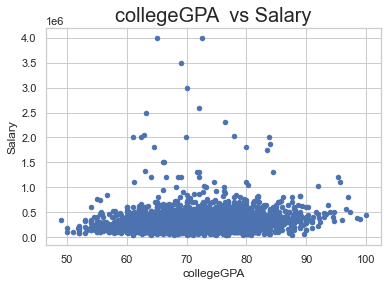

In [80]:
plt.figure(figsize=(20,15))
employee_df.plot(x='collegeGPA',y="Salary",kind='scatter')
plt.title("collegeGPA  vs Salary", size=20)

### Observations

* From the above graph it shows that there is no relation between collegeGPA and salary
* Salary is not dependent on collegeGPA

### Regression plot-Comparison of Salary and Aptitude score 

Text(0.5, 1.0, 'Aptitude score vs Salary')

<Figure size 1440x1080 with 0 Axes>

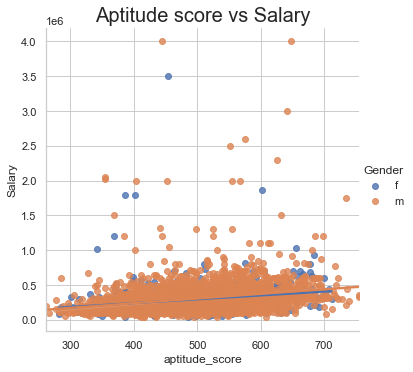

In [81]:
plt.figure(figsize=(20,15))
sns.lmplot(x="aptitude_score",y="Salary",hue="Gender",data=employee_df)
plt.title("Aptitude score vs Salary", size=20)


### Observations

* From the above plot we can infer that the salary and aptitude score(eng+logical+quant)/3 has a positive relation with salary
* salary is dependend on aptitude score

### Regression plot-Comparison of Salary and Technical score 

Text(0.5, 1.0, 'Technical Score vs Salary')

<Figure size 1440x1080 with 0 Axes>

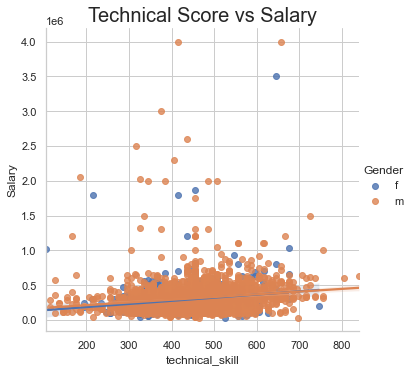

In [82]:
plt.figure(figsize=(20,15))
sns.lmplot(x="technical_skill",y="Salary",hue="Gender",data=employee_df)
plt.title("Technical Score vs Salary", size=20)

### Observations

* From the above graph we can infer that there is positive relation between salary and technical skill
* salary is dependend on technical Score(Domain +Computer programming)

In [83]:
employee_df["age_joining"]=employee_df["age_joining"].replace(0,22)


### Regression plot-Comparison of Personality test and salary

Text(0.5, 1.0, 'Personality test vs Salary')

<Figure size 1440x1080 with 0 Axes>

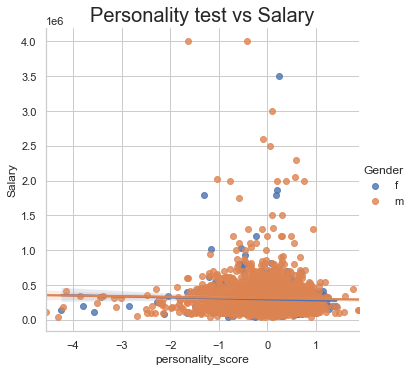

In [84]:
plt.figure(figsize=(20,15))
sns.lmplot(x="personality_score",y="Salary",hue="Gender",data=employee_df)
plt.title("Personality test vs Salary", size=20)

### Observations

* from the above graph we can infer that the personality test score  has negative correlation with salary
* salary is not dependend on personality test score 

In [85]:
employee_df

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,aptitude_score,Acadperf,technical_skill,personality_score,age_joining
0,420000,2012,2015,senior quality engineer,Bangalore,f,1990,84.30,state,2007,95.80,state,2,B.Tech/B.E.,CS,78.00,0,Andhra Pradesh,2011,515,585,525,0.635979,445.0,407.0,0.9737,0.8128,0.5269,1.35490,-0.4455,541.666667,86.033333,445.635979,0.673975,22
1,500000,2013,2015,assistant manager,Indore,m,1989,85.40,cbse,2007,85.00,cbse,2,B.Tech/B.E.,EC,70.06,0,Madhya Pradesh,2012,695,610,780,0.960603,455.0,407.0,-0.7335,0.3789,1.2396,-0.10760,0.8637,695.000000,80.153333,455.960603,0.100375,24
2,325000,2014,2015,systems engineer,Chennai,f,1992,85.00,cbse,2010,68.20,cbse,2,B.Tech/B.E.,CS,70.00,0,Uttar Pradesh,2014,615,545,370,0.450877,395.0,407.0,0.2718,1.7109,0.1637,-0.86820,0.6721,510.000000,74.400000,395.450877,0.446650,22
3,1100000,2011,2015,senior software engineer,Gurgaon,m,1989,85.60,cbse,2007,83.60,cbse,1,B.Tech/B.E.,CS,74.64,1,Delhi,2011,635,585,625,0.974396,615.0,407.0,0.0464,0.3448,-0.3440,-0.40780,-0.9194,615.000000,81.280000,615.974396,-0.234000,22
4,200000,2014,2015,get,Manesar,m,1991,78.00,cbse,2008,76.80,cbse,2,B.Tech/B.E.,EC,73.90,0,Uttar Pradesh,2012,545,625,465,0.124502,455.0,407.0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,545.000000,76.233333,455.124502,-0.299542,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,280000,2011,2012,software engineer,New Delhi,m,1987,52.09,cbse,2006,55.50,cbse,2,B.Tech/B.E.,CS,61.50,0,Haryana,2010,365,334,475,0.276047,345.0,407.0,-0.1082,0.3448,0.2366,0.64980,-0.9194,391.333333,56.363333,345.276047,-0.008250,24
3994,100000,2013,2013,technical writer,Hyderabad,f,1992,90.00,state,2009,93.00,state,2,B.Tech/B.E.,EC,77.30,1,Telangana,2013,415,410,535,0.881620,325.0,407.0,-0.3027,0.8784,0.9322,0.77980,-0.0943,453.333333,86.766667,325.881620,0.315300,21
3995,320000,2013,2015,associate software engineer,Bangalore,m,1991,81.86,state,2008,65.50,state,2,B.Tech/B.E.,CS,70.00,0,Orissa,2012,475,475,465,0.488348,405.0,407.0,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615,471.666667,72.453333,405.488348,-1.295925,22
3996,200000,2014,2015,software developer,Asifabadbanglore,f,1992,78.72,state,2010,69.88,state,2,B.Tech/B.E.,CS,70.42,1,Karnataka,2014,450,410,320,0.744758,445.0,438.0,-0.1590,0.0459,-0.4511,-0.36120,-0.0943,393.333333,73.006667,445.744758,-0.142150,22


## Multivariate Analysis


## Pair Plot

<Figure size 216x216 with 0 Axes>

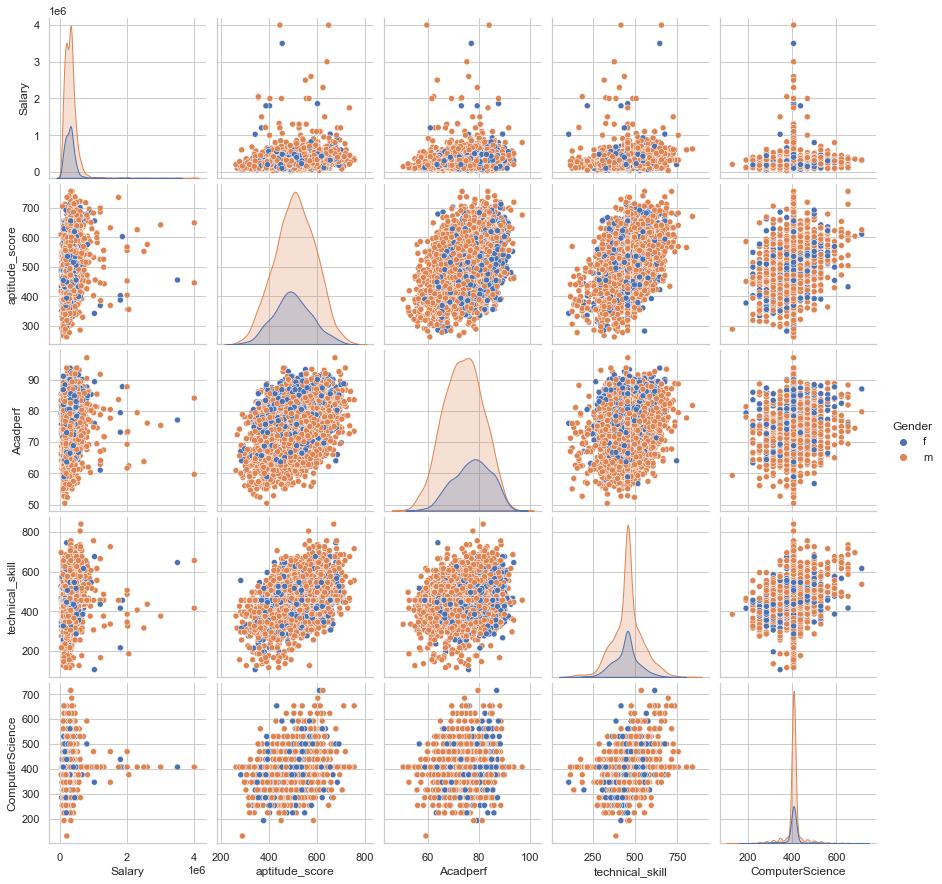

In [111]:
plt.figure(figsize=(3,3))
sns.pairplot(employee_df,vars=["Salary","aptitude_score","Acadperf","technical_skill","ComputerScience"],hue="Gender",diag_kind='kde',kind='scatter')

### Observations 

Sactter plot gives the relation between variables 
* Salary has a positive relatioship with aptitude score, academic performance and techical skill

### Conclusion 

From the above analysis of data the salary of the students is higly dependend on their
* Academic, technical, aptitude skill, college tier, 10th and 12th board , Degree and Specialization
* We can predict the salary of students based on the above data 